In [176]:
# Kapil Kumar
# ICM 317 Project- Machine Learning - Part A
# Developed on Mac Platform and fully tested on Windows Box at ICMA centre 

In [356]:
## Please Set Path and file name here --
#For windows in this format 
#path = 'D:\\Downloads\\r******\\Downloads\\'

path = '/Users/kapildevarsh/Documents/Machine Learning & Big Data /Machine Learning/Machine Learning Project-Part1/Assignment/'
file = 'ICM317_Report_Part1_DataSet_2000Rows.csv'

In [357]:
import pandas as pd
import os
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [358]:
## Data Load from csv file

os.chdir(path)
df_masterdata  = pd.read_csv(file, skiprows=0)
df_masterdata

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1997        4     0.09        2        4        0     0.19        1        4   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G5  FEAT_G6  FEAT_G7  FEAT_G8  \
0           9      0.2     0.16    -0.16     0.16  GROUP_B        7      6.0   
1          10      0.4     0.03    -0.58     0.58  GROUP_B        7      4.0   
2           5      0.1     0.00    -0.89     0.89  GROUP_B        5     10.0   
3           1      0.3     0.97    -0.01     0.01  GROUP_A        0      7.0   
4           4      0.9     0.47    -0.67     0.67  GROUP_A        3      7.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        2      0.2     0.71     0.00     0.00  GROUP_A        1      3.0   
1996        1      0.7     0.15    -0.88     0.88  GROUP_A        0      9.0   
1997        6      0.9     0.16    -0.52     0.52  GROUP_C        9      NaN   
1998        7      0.8     0.02    -0.28     0.28  GROUP_A        4      8.0   
1999        2      0.6     0.31     0.00     0.00  GROUP_A        2      2.0   

      CATEGORY  
0            2  
1            2  
2            2  
3            0  
4            1  
...        ...  
1995         1  
1996         0  
1997         0  
1998         0  
1999         0  

[2000 rows x 17 columns]

In [359]:
### STEP 1 - DATA EXPLORATORY ANALYSIS - KNOW YOUR DATA

In [360]:
## Check for basic info of the provided dataset
df_masterdata.info()
# Data type of FEAT_G6 is object ; we will need to convert into integer in Pre-processing step
# FEAT_G8 has only 1816 non null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEAT_E1   2000 non-null   int64  
 1   FEAT_E2   2000 non-null   float64
 2   FEAT_E3   2000 non-null   int64  
 3   FEAT_E4   2000 non-null   int64  
 4   FEAT_S1   2000 non-null   int64  
 5   FEAT_S2   2000 non-null   float64
 6   FEAT_S3   2000 non-null   int64  
 7   FEAT_S4   2000 non-null   int64  
 8   FEAT_G1   2000 non-null   int64  
 9   FEAT_G2   2000 non-null   float64
 10  FEAT_G3   2000 non-null   float64
 11  FEAT_G4   2000 non-null   float64
 12  FEAT_G5   2000 non-null   float64
 13  FEAT_G6   2000 non-null   object 
 14  FEAT_G7   2000 non-null   int64  
 15  FEAT_G8   1816 non-null   float64
 16  CATEGORY  2000 non-null   int64  
dtypes: float64(7), int64(9), object(1)
memory usage: 265.8+ KB


In [361]:
## check for null values
df_masterdata.isnull().sum() 

FEAT_E1       0
FEAT_E2       0
FEAT_E3       0
FEAT_E4       0
FEAT_S1       0
FEAT_S2       0
FEAT_S3       0
FEAT_S4       0
FEAT_G1       0
FEAT_G2       0
FEAT_G3       0
FEAT_G4       0
FEAT_G5       0
FEAT_G6       0
FEAT_G7       0
FEAT_G8     184
CATEGORY      0
dtype: int64

In [362]:
## Check for balanced / unbalanced data 
df_masterdata['CATEGORY'].value_counts()
# Out of 2000 companies , 417 are ESG Losers (category 0) , 1170 are ESG Normal , 363 are ESG Winners and only 50 are ESG Champoins
# We have an imbalanced dataset

CATEGORY
1    1170
0     417
2     363
3      50
Name: count, dtype: int64

In [363]:
## Check for basic statistics
df_masterdata.describe()
# Most of the Features are in the range of 0 - 10 ( some within 0 and 1 and some between 0 & 10 ) and have positive values, however notable exceptions are - 
 #FEAT_G7 with max of 1000 and FEAT_G4 having values between -1 and 0 
 #We will need to feature scale the data

FEAT_E1      FEAT_E2      FEAT_E3      FEAT_E4      FEAT_S1  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      4.949000     0.345520     0.992500     3.007500     5.072000   
std       3.221737     0.302412     0.728498     1.212509     3.136676   
min       0.000000     0.000000     0.000000     1.000000     0.000000   
25%       2.000000     0.070000     0.000000     2.000000     2.000000   
50%       5.000000     0.270000     1.000000     3.000000     5.000000   
75%       8.000000     0.590000     2.000000     4.000000     8.000000   
max      10.000000     1.000000     2.000000     5.000000    10.000000   

           FEAT_S2      FEAT_S3      FEAT_S4      FEAT_G1      FEAT_G2  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.333000     0.996000     2.944000     5.111500     0.504850   
std       0.295212     0.719891     1.243236     3.117359     0.293453   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.070000     0.000000     2.000000     2.000000     0.300000   
50%       0.250000     1.000000     3.000000     5.000000     0.500000   
75%       0.570000     2.000000     4.000000     8.000000     0.800000   
max       1.000000     2.000000     5.000000    10.000000     1.000000   

           FEAT_G3      FEAT_G4      FEAT_G5      FEAT_G7      FEAT_G8  \
count  2000.000000  2000.000000  2000.000000  2000.000000  1816.000000   
mean      0.327415    -0.328480     0.328480    34.414000     4.997797   
std       0.297163     0.297259     0.297259   168.417261     3.216006   
min       0.000000    -1.000000     0.000000     0.000000     0.000000   
25%       0.060000    -0.552500     0.060000     3.000000     2.000000   
50%       0.240000    -0.250000     0.250000     5.000000     5.000000   
75%       0.542500    -0.060000     0.552500     8.000000     8.000000   
max       1.000000     0.000000     1.000000  1000.000000    10.000000   

          CATEGORY  
count  2000.000000  
mean      1.023000  
std       0.699797  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       3.000000

In [364]:
df_masterdata.describe().to_clipboard()

In [365]:
features = df_masterdata.columns
features.values

array(['FEAT_E1', 'FEAT_E2', 'FEAT_E3', 'FEAT_E4', 'FEAT_S1', 'FEAT_S2',
       'FEAT_S3', 'FEAT_S4', 'FEAT_G1', 'FEAT_G2', 'FEAT_G3', 'FEAT_G4',
       'FEAT_G5', 'FEAT_G6', 'FEAT_G7', 'FEAT_G8', 'CATEGORY'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

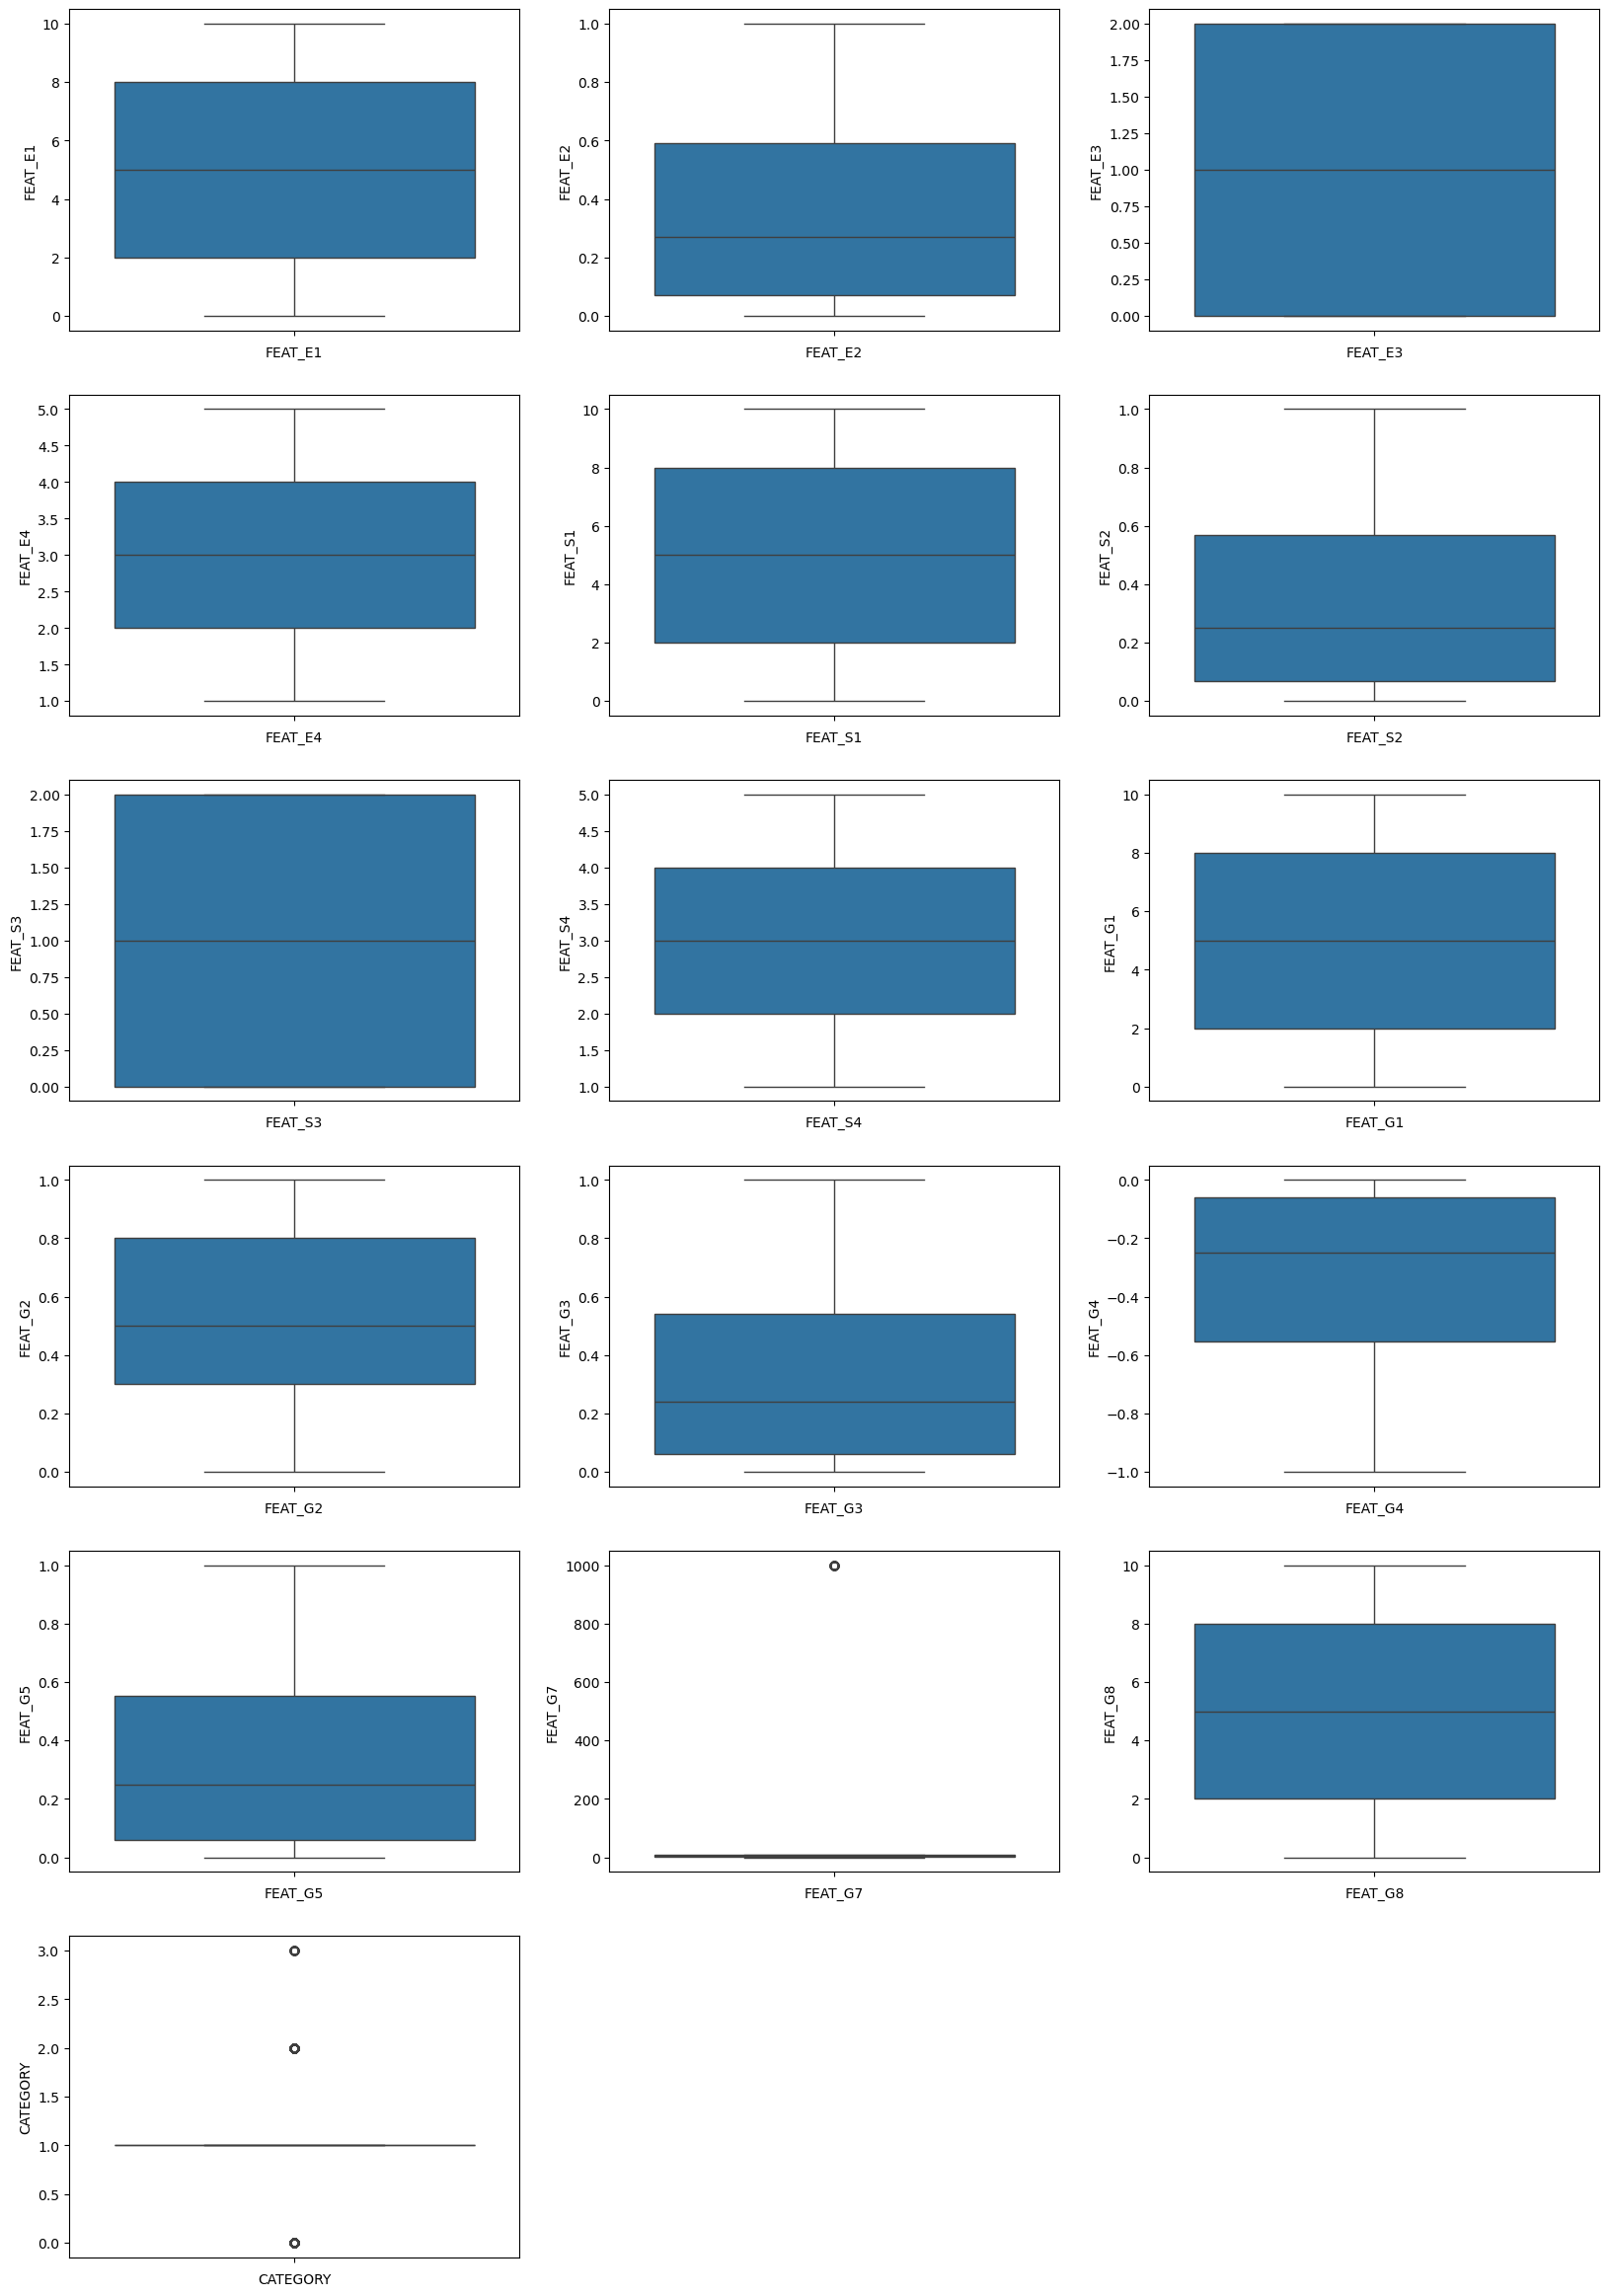

In [366]:
## Check for outliers
import seaborn as sns

features = df_masterdata.columns
#features.values

plt.figure(figsize=(20,60), facecolor='White')
plotnumber = 1
for feature in features:
    if(feature == 'FEAT_G6'):
        continue
    ax= plt.subplot(12,3,plotnumber)
    sns.boxplot(df_masterdata[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show

# FEAT_G7 contains outliers - most of the data is around 0 with a handful of values reaching 1000.
# Other Features do not contain outliers
# Target has most of the values as Category 1 (ESG_NORMAL) 

/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_13275/2127793427.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_masterdata[feature])
/var/folders/4h/vrjz7r7j1n59jzbgtr1k58tr0000gn/T/ipykernel_13275/2127793427.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_masterdata[fe

<function matplotlib.pyplot.show(close=None, block=None)>

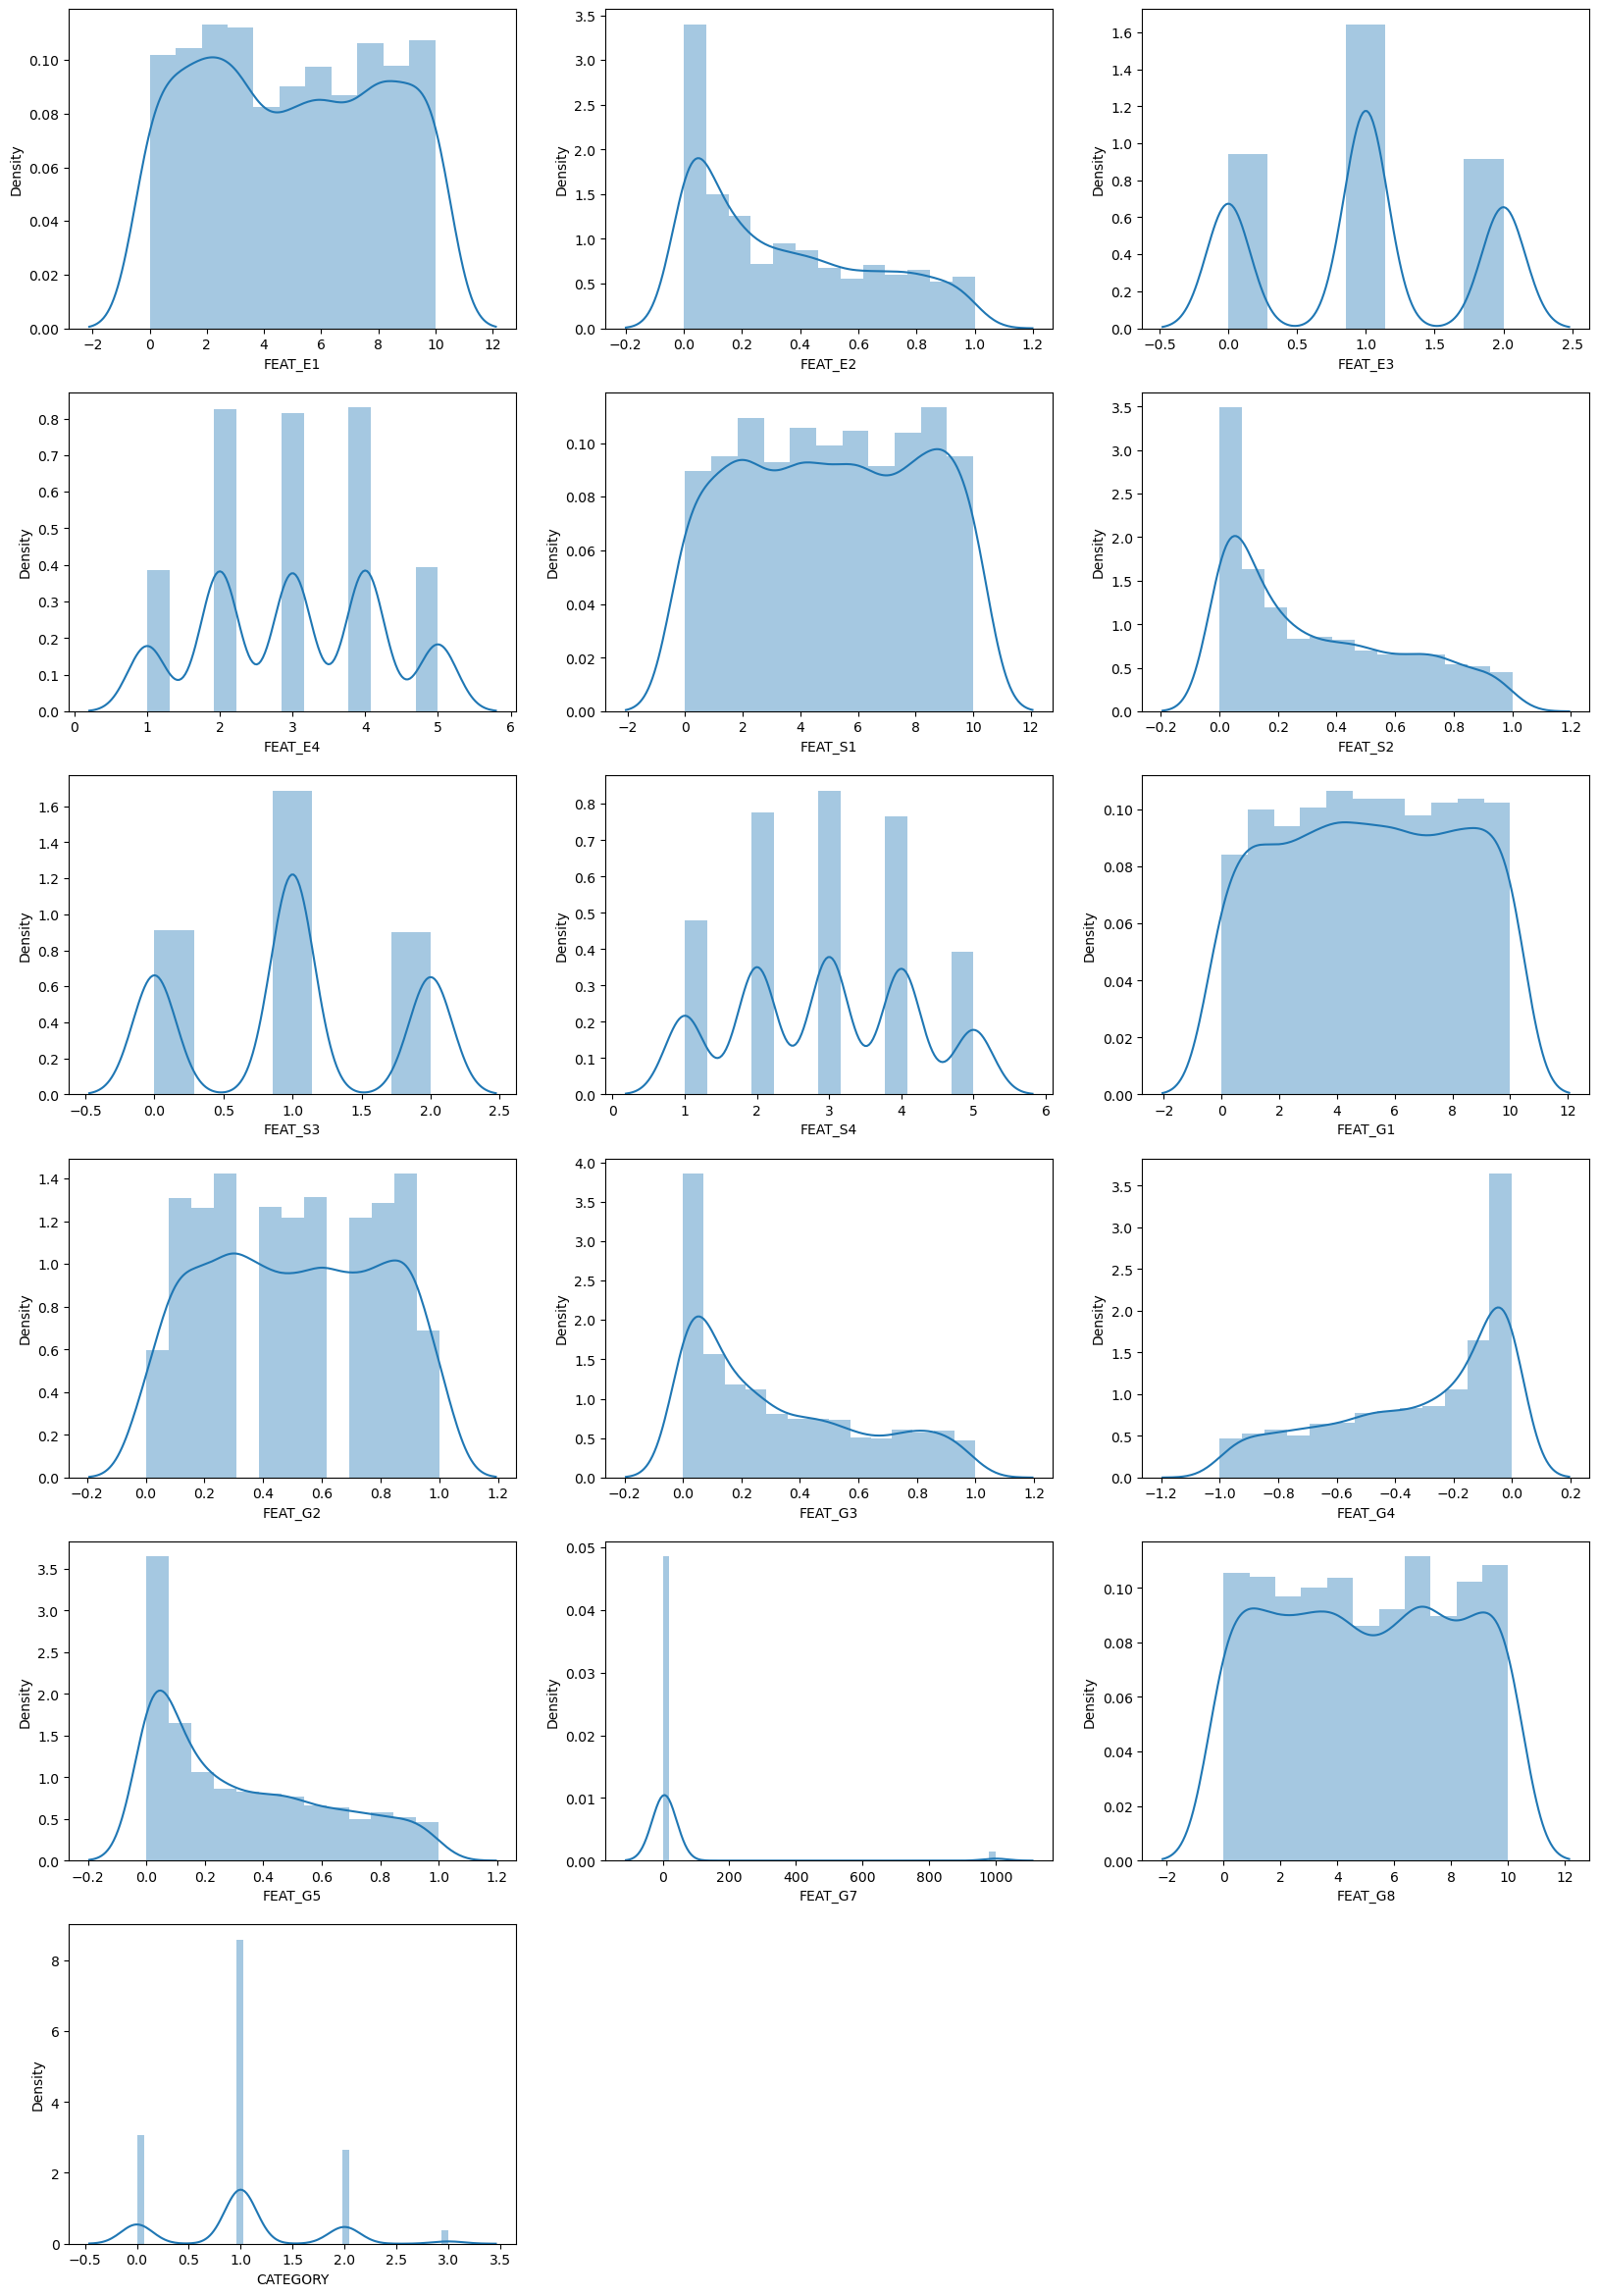

In [367]:
## Analyze the Distribution of data -  Check & visualize distributions of all the features
plt.figure(figsize=(20,60), facecolor='White')
plotnumber = 1
for feature in features.values:
    if(feature == 'FEAT_G6'):
        continue
    ax= plt.subplot(12,3,plotnumber)
    sns.distplot(df_masterdata[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show

# We see that although there is some symmetry in data distribution for some features, most of the Data is not normally distributed4 and G5
# Features G4 and G5 have similar but inverse distributions
# Features G8 and G1 have similar distributions

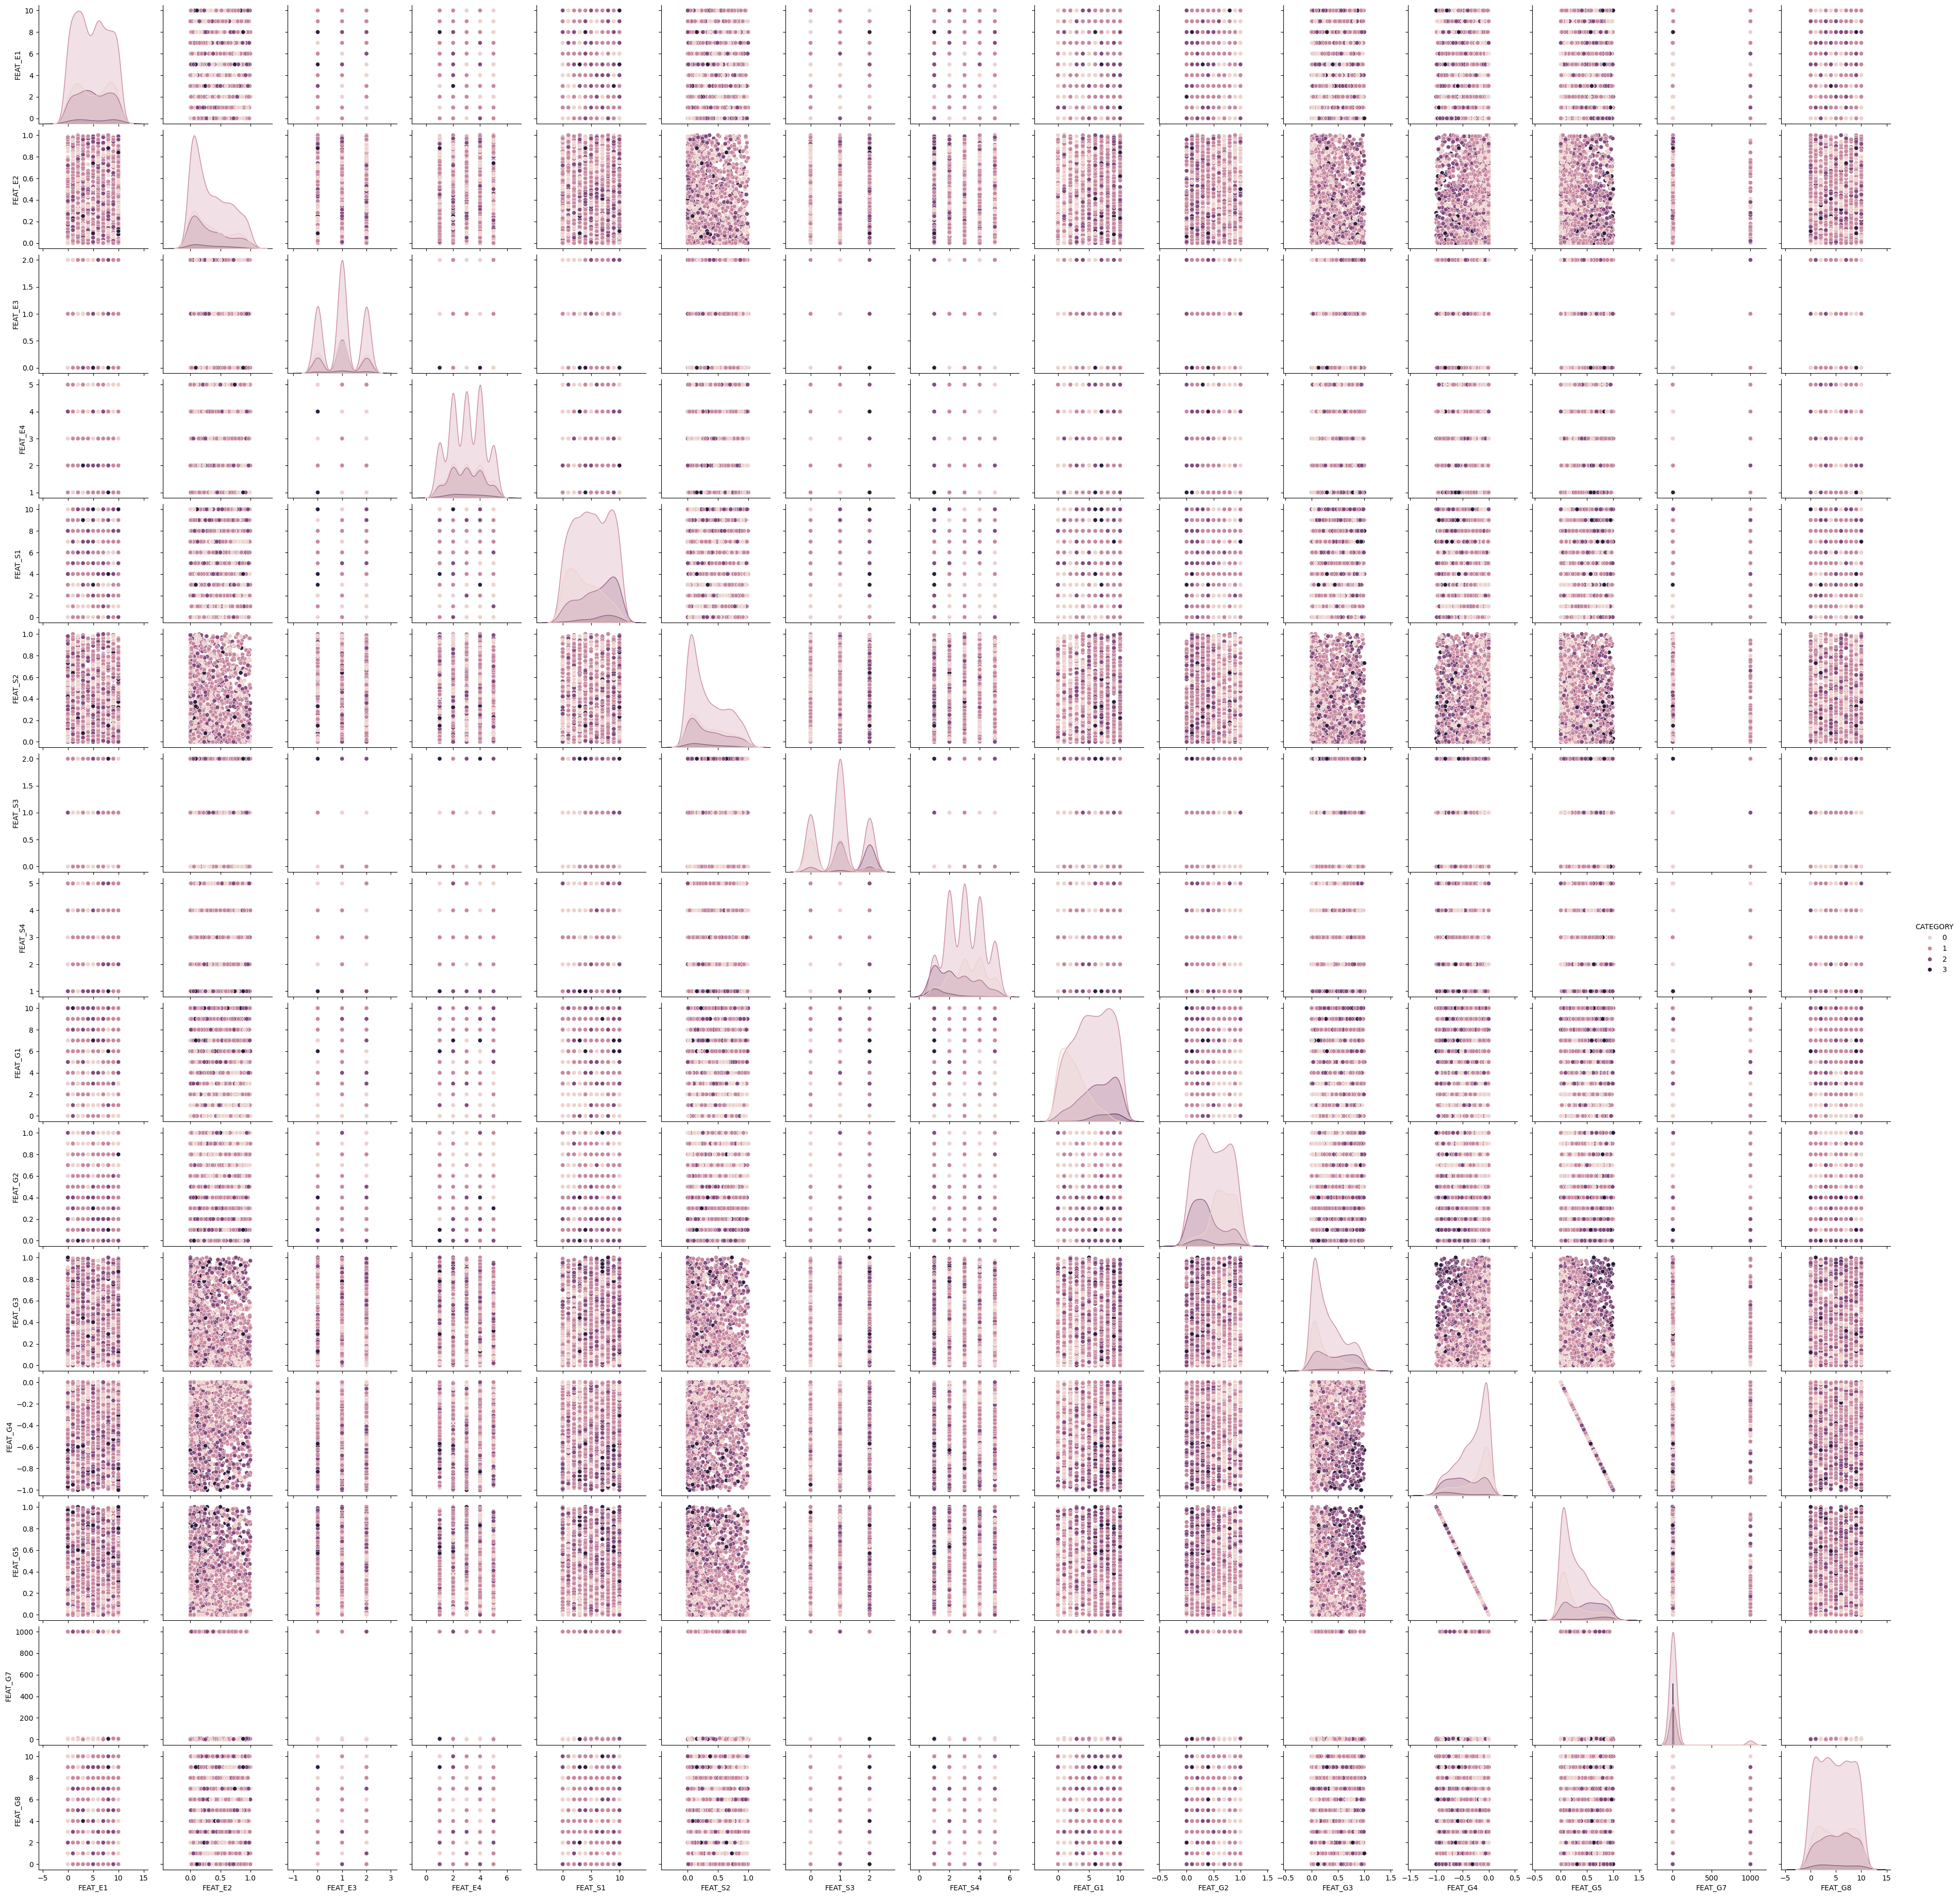

In [368]:
## Explore and visualize dataset pairwise 
sns.pairplot(df_masterdata, hue="CATEGORY")

In [369]:
''' After careful analysis of the above charts and visualizations, following features need to be checked for correlation
Environment - FEAT_E1 and FEAT_G7, FEAT_E1 and FEAT_S3, FEAT_E1 and FEAT_E4, FEAT_E1 and FEAT_E3
            - FEAT_E2 and FEAT_S4, FEAT_E2 and FEAT_S4, FEAT_E2 and FEAT_S3, FEAT_E2 and FEAT_E3
            - FEAT_E3 and FEAT_S3, FEAT_E3 and FEAT_G7, FEAT_E3 and FEAT_G5 , FEAT_E3 and FEAT_G4, FEAT_E3 and FEAT_S4
            - FEAT_E4 and FEAT_G7, FEAT_E4 and FEAT_E3, FEAT_E4 and FEAT_S4 , FEAT_E4 and FEAT_G2
            - FEAT_S1 and FEAT_S3 and FEAT_S2 and FEAT_S3
            - FEAT_S3 and FEAT_G8, FEAT_S3 and FEAT_G7, FEAT_S3 and FEAT_G2, FEAT_S3 and FEAT_G3, FEAT_S3 and FEAT_S4 , FEAT_S4 and FEAT_G7'''

' After careful analysis of the above charts and visualizations, following features need to be checked for correlation\nEnvironment - FEAT_E1 and FEAT_G7, FEAT_E1 and FEAT_S3, FEAT_E1 and FEAT_E4, FEAT_E1 and FEAT_E3\n            - FEAT_E2 and FEAT_S4, FEAT_E2 and FEAT_S4, FEAT_E2 and FEAT_S3, FEAT_E2 and FEAT_E3\n            - FEAT_E3 and FEAT_S3, FEAT_E3 and FEAT_G7, FEAT_E3 and FEAT_G5 , FEAT_E3 and FEAT_G4, FEAT_E3 and FEAT_S4\n            - FEAT_E4 and FEAT_G7, FEAT_E4 and FEAT_E3, FEAT_E4 and FEAT_S4 , FEAT_E4 and FEAT_G2\n            - FEAT_S1 and FEAT_S3 and FEAT_S2 and FEAT_S3\n            - FEAT_S3 and FEAT_G8, FEAT_S3 and FEAT_G7, FEAT_S3 and FEAT_G2, FEAT_S3 and FEAT_G3, FEAT_S3 and FEAT_S4 , FEAT_S4 and FEAT_G7'

'Observation - The FEAT_G7 outliers (values of 1000) are indeed important as it easlily distinguishes ESG_CHAMPIONS with the all the rest who lies on the extreme end of FEAT_G7'

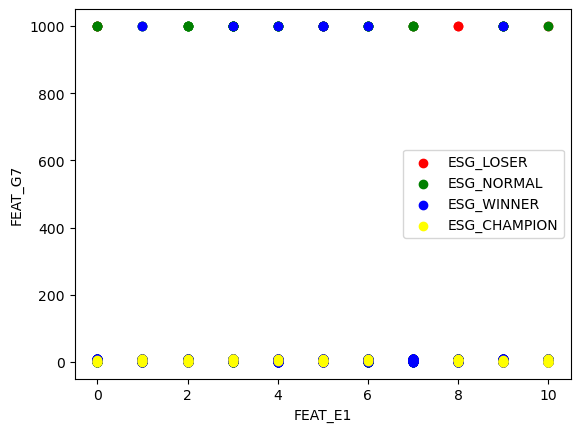

In [370]:
## Scatter Plots - Plot the data for each category / class

features_env = ['FEAT_E1', 'FEAT_E2', 'FEAT_E3', 'FEAT_E4'    ]
features_soc = ['FEAT_S1', 'FEAT_S2', 'FEAT_S3'  , 'FEAT_S4'  ]
features_gov = ['FEAT_G1', 'FEAT_G2', 'FEAT_G3', 'FEAT_G4','FEAT_G5','FEAT_G6','FEAT_G7','FEAT_G8' ]

colors = ['Red', 'Green' , 'Blue' , 'Yellow']
classes = ['ESG_LOSER','ESG_NORMAL','ESG_WINNER','ESG_CHAMPION']


#for feature in features:
        
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_E1'],df['FEAT_G7'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_E1')
plt.ylabel('FEAT_G7')
plt.legend()
    
'''Observation - The FEAT_G7 outliers (values of 1000) are indeed important as it easlily distinguishes ESG_CHAMPIONS with the all the rest who lies on the extreme end of FEAT_G7'''

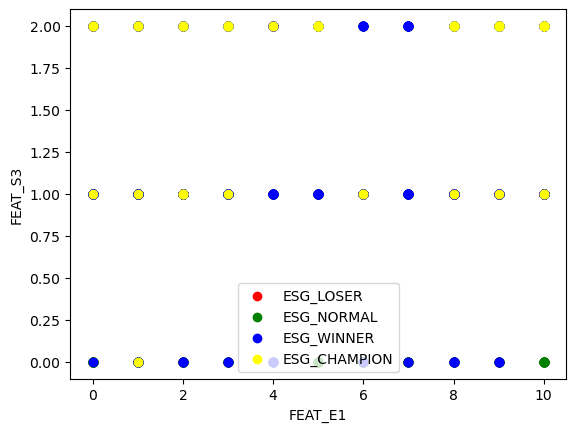

In [371]:
# Scatter Plot 2
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_E1'],df['FEAT_S3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_E1')
plt.ylabel('FEAT_S3')
plt.legend()

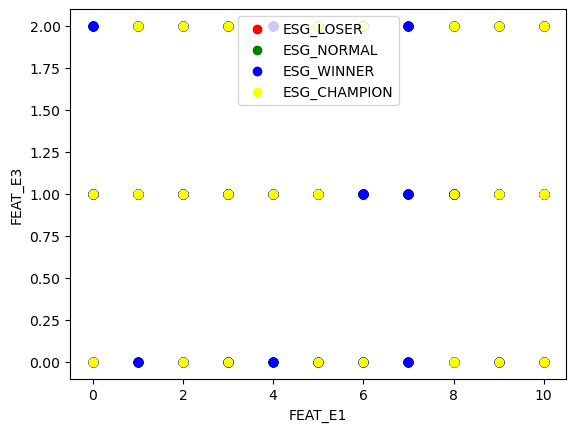

In [372]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_E1'],df['FEAT_E3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_E1')
plt.ylabel('FEAT_E3')
plt.legend()

In [373]:
# Looks like Environment features play an important role for ESG_CHAMPOIN category 

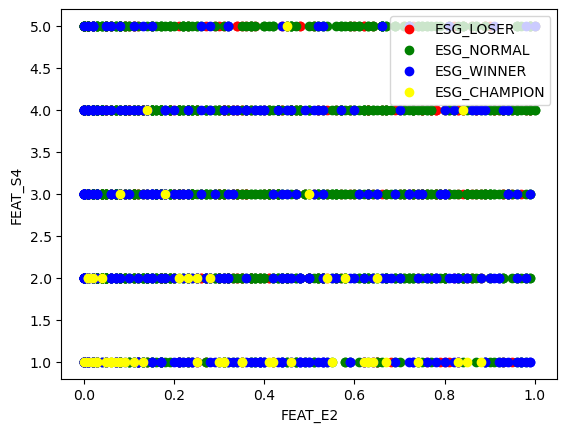

In [374]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_E2'],df['FEAT_S4'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_E2')
plt.ylabel('FEAT_S4')
plt.legend()

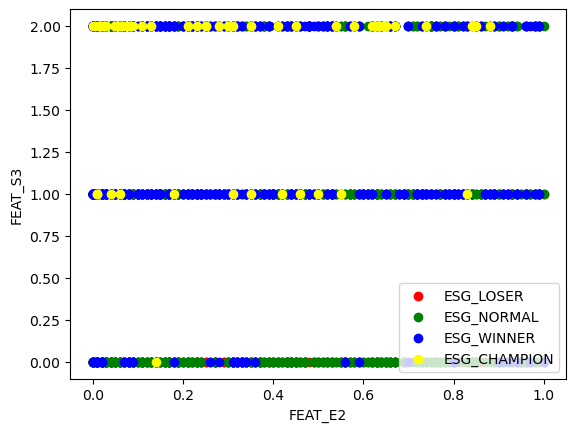

In [375]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_E2'],df['FEAT_S3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_E2')
plt.ylabel('FEAT_S3')
plt.legend()

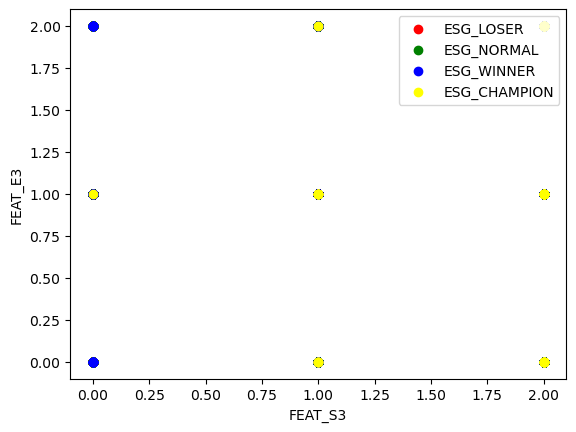

In [376]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_S3'],df['FEAT_E3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_S3')
plt.ylabel('FEAT_E3')
plt.legend()

# This suggests these features are important for distinguishing ESH_CHAMPION category from the ESG_Winner category 

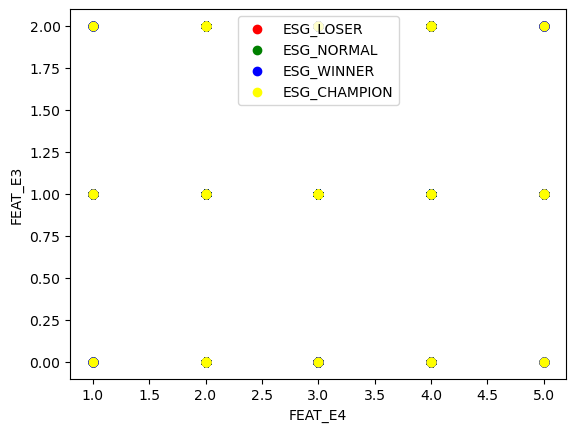

In [377]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_E4'],df['FEAT_E3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_E4')
plt.ylabel('FEAT_E3')
plt.legend()

# Looks like Environment features play an important role for ESG_CHAMPOIN category 

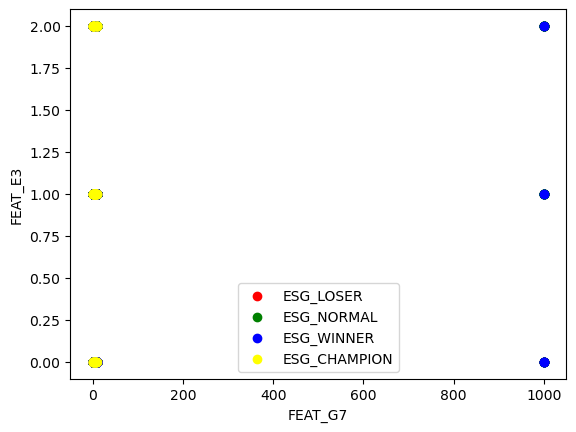

In [378]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_G7'],df['FEAT_E3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_G7')
plt.ylabel('FEAT_E3')
plt.legend()

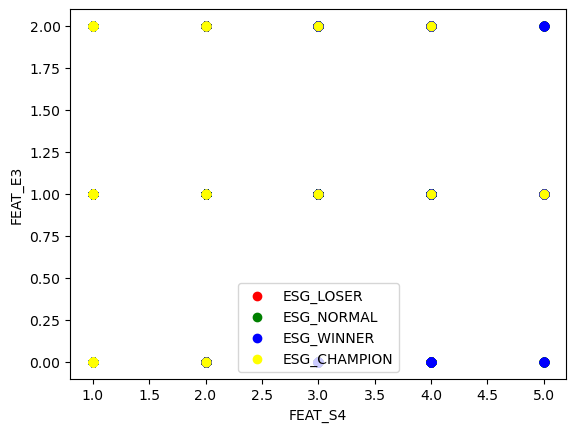

In [379]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_S4'],df['FEAT_E3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_S4')
plt.ylabel('FEAT_E3')
plt.legend()

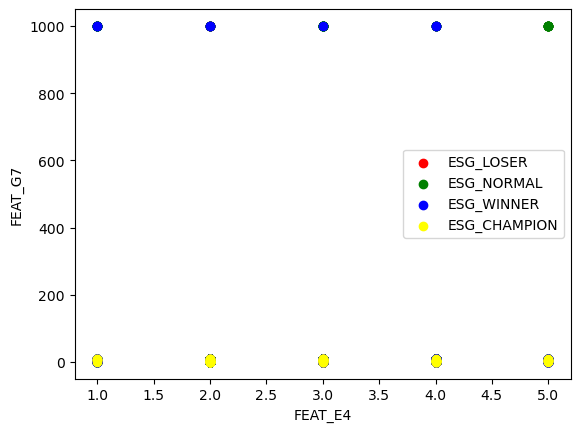

In [380]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_E4'],df['FEAT_G7'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_E4')
plt.ylabel('FEAT_G7')
plt.legend()

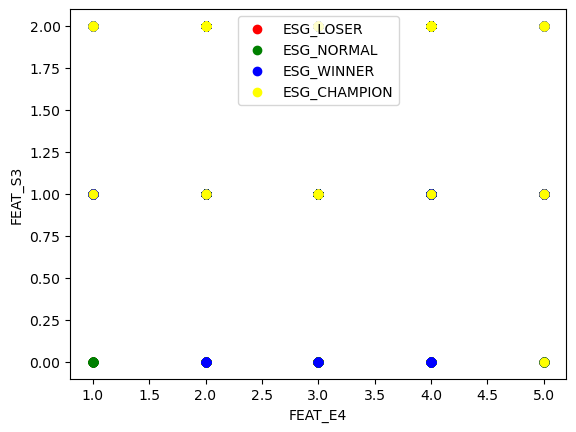

In [381]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_E4'],df['FEAT_S3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_E4')
plt.ylabel('FEAT_S3')
plt.legend()

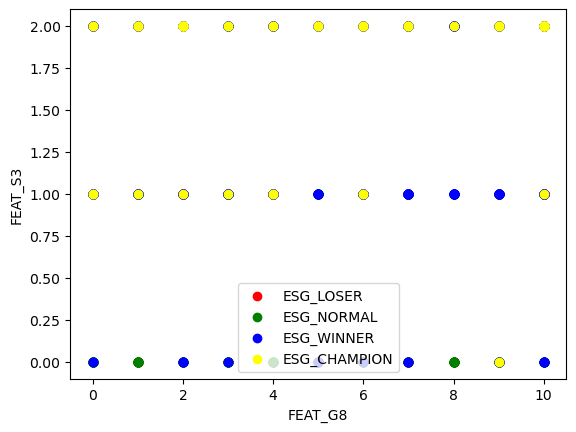

In [382]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_G8'],df['FEAT_S3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_G8')
plt.ylabel('FEAT_S3')
plt.legend()

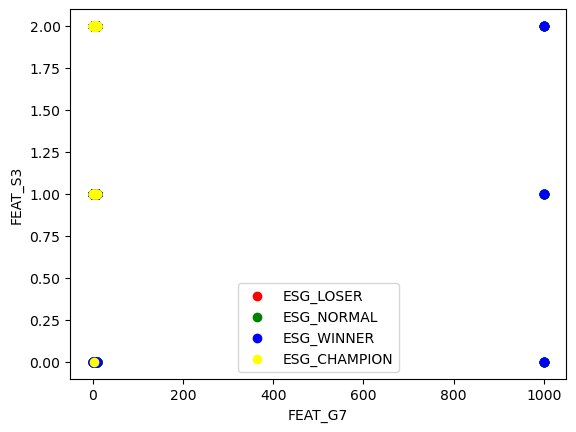

In [383]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_G7'],df['FEAT_S3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_G7')
plt.ylabel('FEAT_S3')
plt.legend()

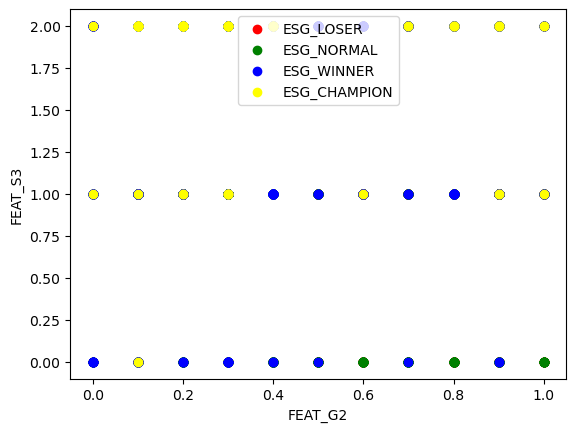

In [384]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_G2'],df['FEAT_S3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_G2')
plt.ylabel('FEAT_S3')
plt.legend()

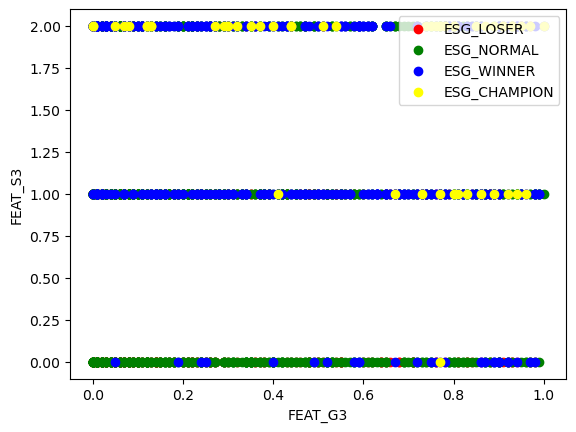

In [385]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_G3'],df['FEAT_S3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_G3')
plt.ylabel('FEAT_S3')
plt.legend()

Text(0, 0.5, 'FEAT_G8')

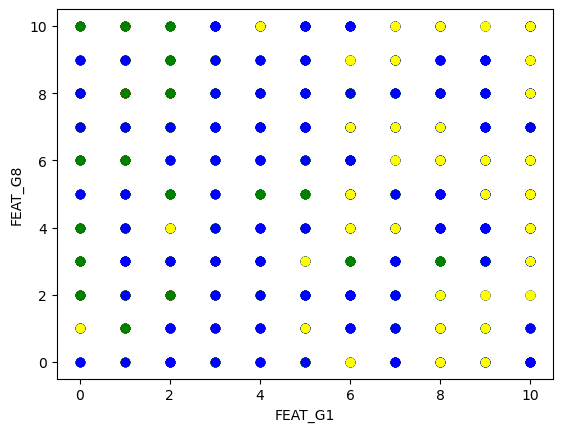

In [386]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_G1'],df['FEAT_G8'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_G1')
plt.ylabel('FEAT_G8')
#plt.legend()

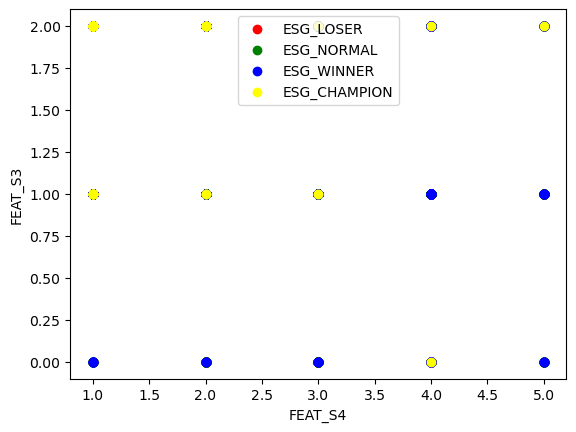

In [387]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_S4'],df['FEAT_S3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_S4')
plt.ylabel('FEAT_S3')
plt.legend()

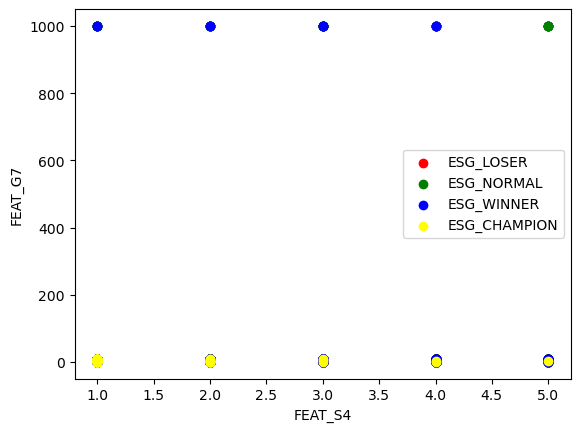

In [388]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_S4'],df['FEAT_G7'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_S4')
plt.ylabel('FEAT_G7')
plt.legend()

Text(0, 0.5, 'FEAT_G3')

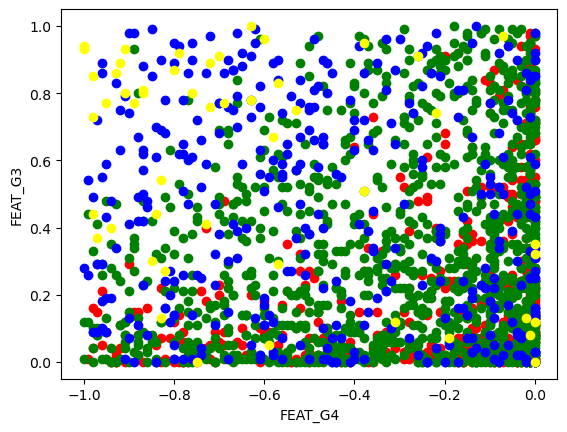

In [389]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_G4'],df['FEAT_G3'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_G4')
plt.ylabel('FEAT_G3')
#plt.legend()

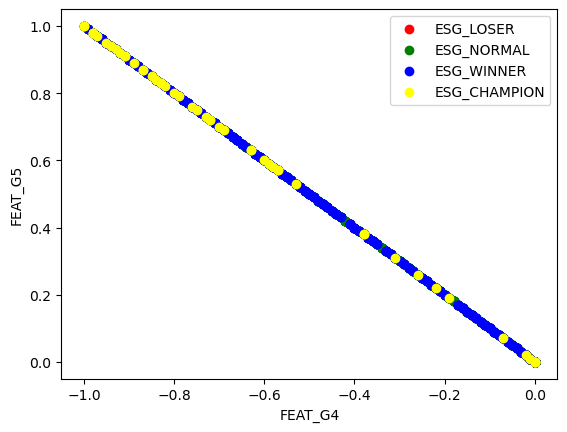

In [390]:
for i in range (4):
    df = df_masterdata[df_masterdata['CATEGORY'] == i]
    plt.scatter(df['FEAT_G4'],df['FEAT_G5'], c = colors[i], label = classes[i])
plt.xlabel('FEAT_G4')
plt.ylabel('FEAT_G5')
plt.legend()
# Overlapping features, one can be eliminated

In [391]:
# Making a working copy of ALl Data
df_workingdata = df_masterdata.copy()
df_workingdata



FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1997        4     0.09        2        4        0     0.19        1        4   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G5  FEAT_G6  FEAT_G7  FEAT_G8  \
0           9      0.2     0.16    -0.16     0.16  GROUP_B        7      6.0   
1          10      0.4     0.03    -0.58     0.58  GROUP_B        7      4.0   
2           5      0.1     0.00    -0.89     0.89  GROUP_B        5     10.0   
3           1      0.3     0.97    -0.01     0.01  GROUP_A        0      7.0   
4           4      0.9     0.47    -0.67     0.67  GROUP_A        3      7.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        2      0.2     0.71     0.00     0.00  GROUP_A        1      3.0   
1996        1      0.7     0.15    -0.88     0.88  GROUP_A        0      9.0   
1997        6      0.9     0.16    -0.52     0.52  GROUP_C        9      NaN   
1998        7      0.8     0.02    -0.28     0.28  GROUP_A        4      8.0   
1999        2      0.6     0.31     0.00     0.00  GROUP_A        2      2.0   

      CATEGORY  
0            2  
1            2  
2            2  
3            0  
4            1  
...        ...  
1995         1  
1996         0  
1997         0  
1998         0  
1999         0  

[2000 rows x 17 columns]

' Few observations from above charts:\n- FEAT_G7 -> if the value is 1000 or not around 0 , then it is not a Category 3 i.e ESG_Champion\n- FEAT_S3 and FEAT_E3 looks similarly related to Category\n- FEAT_E1 value is 7 or FEAT_E2 value is 1 , it is not category 3'

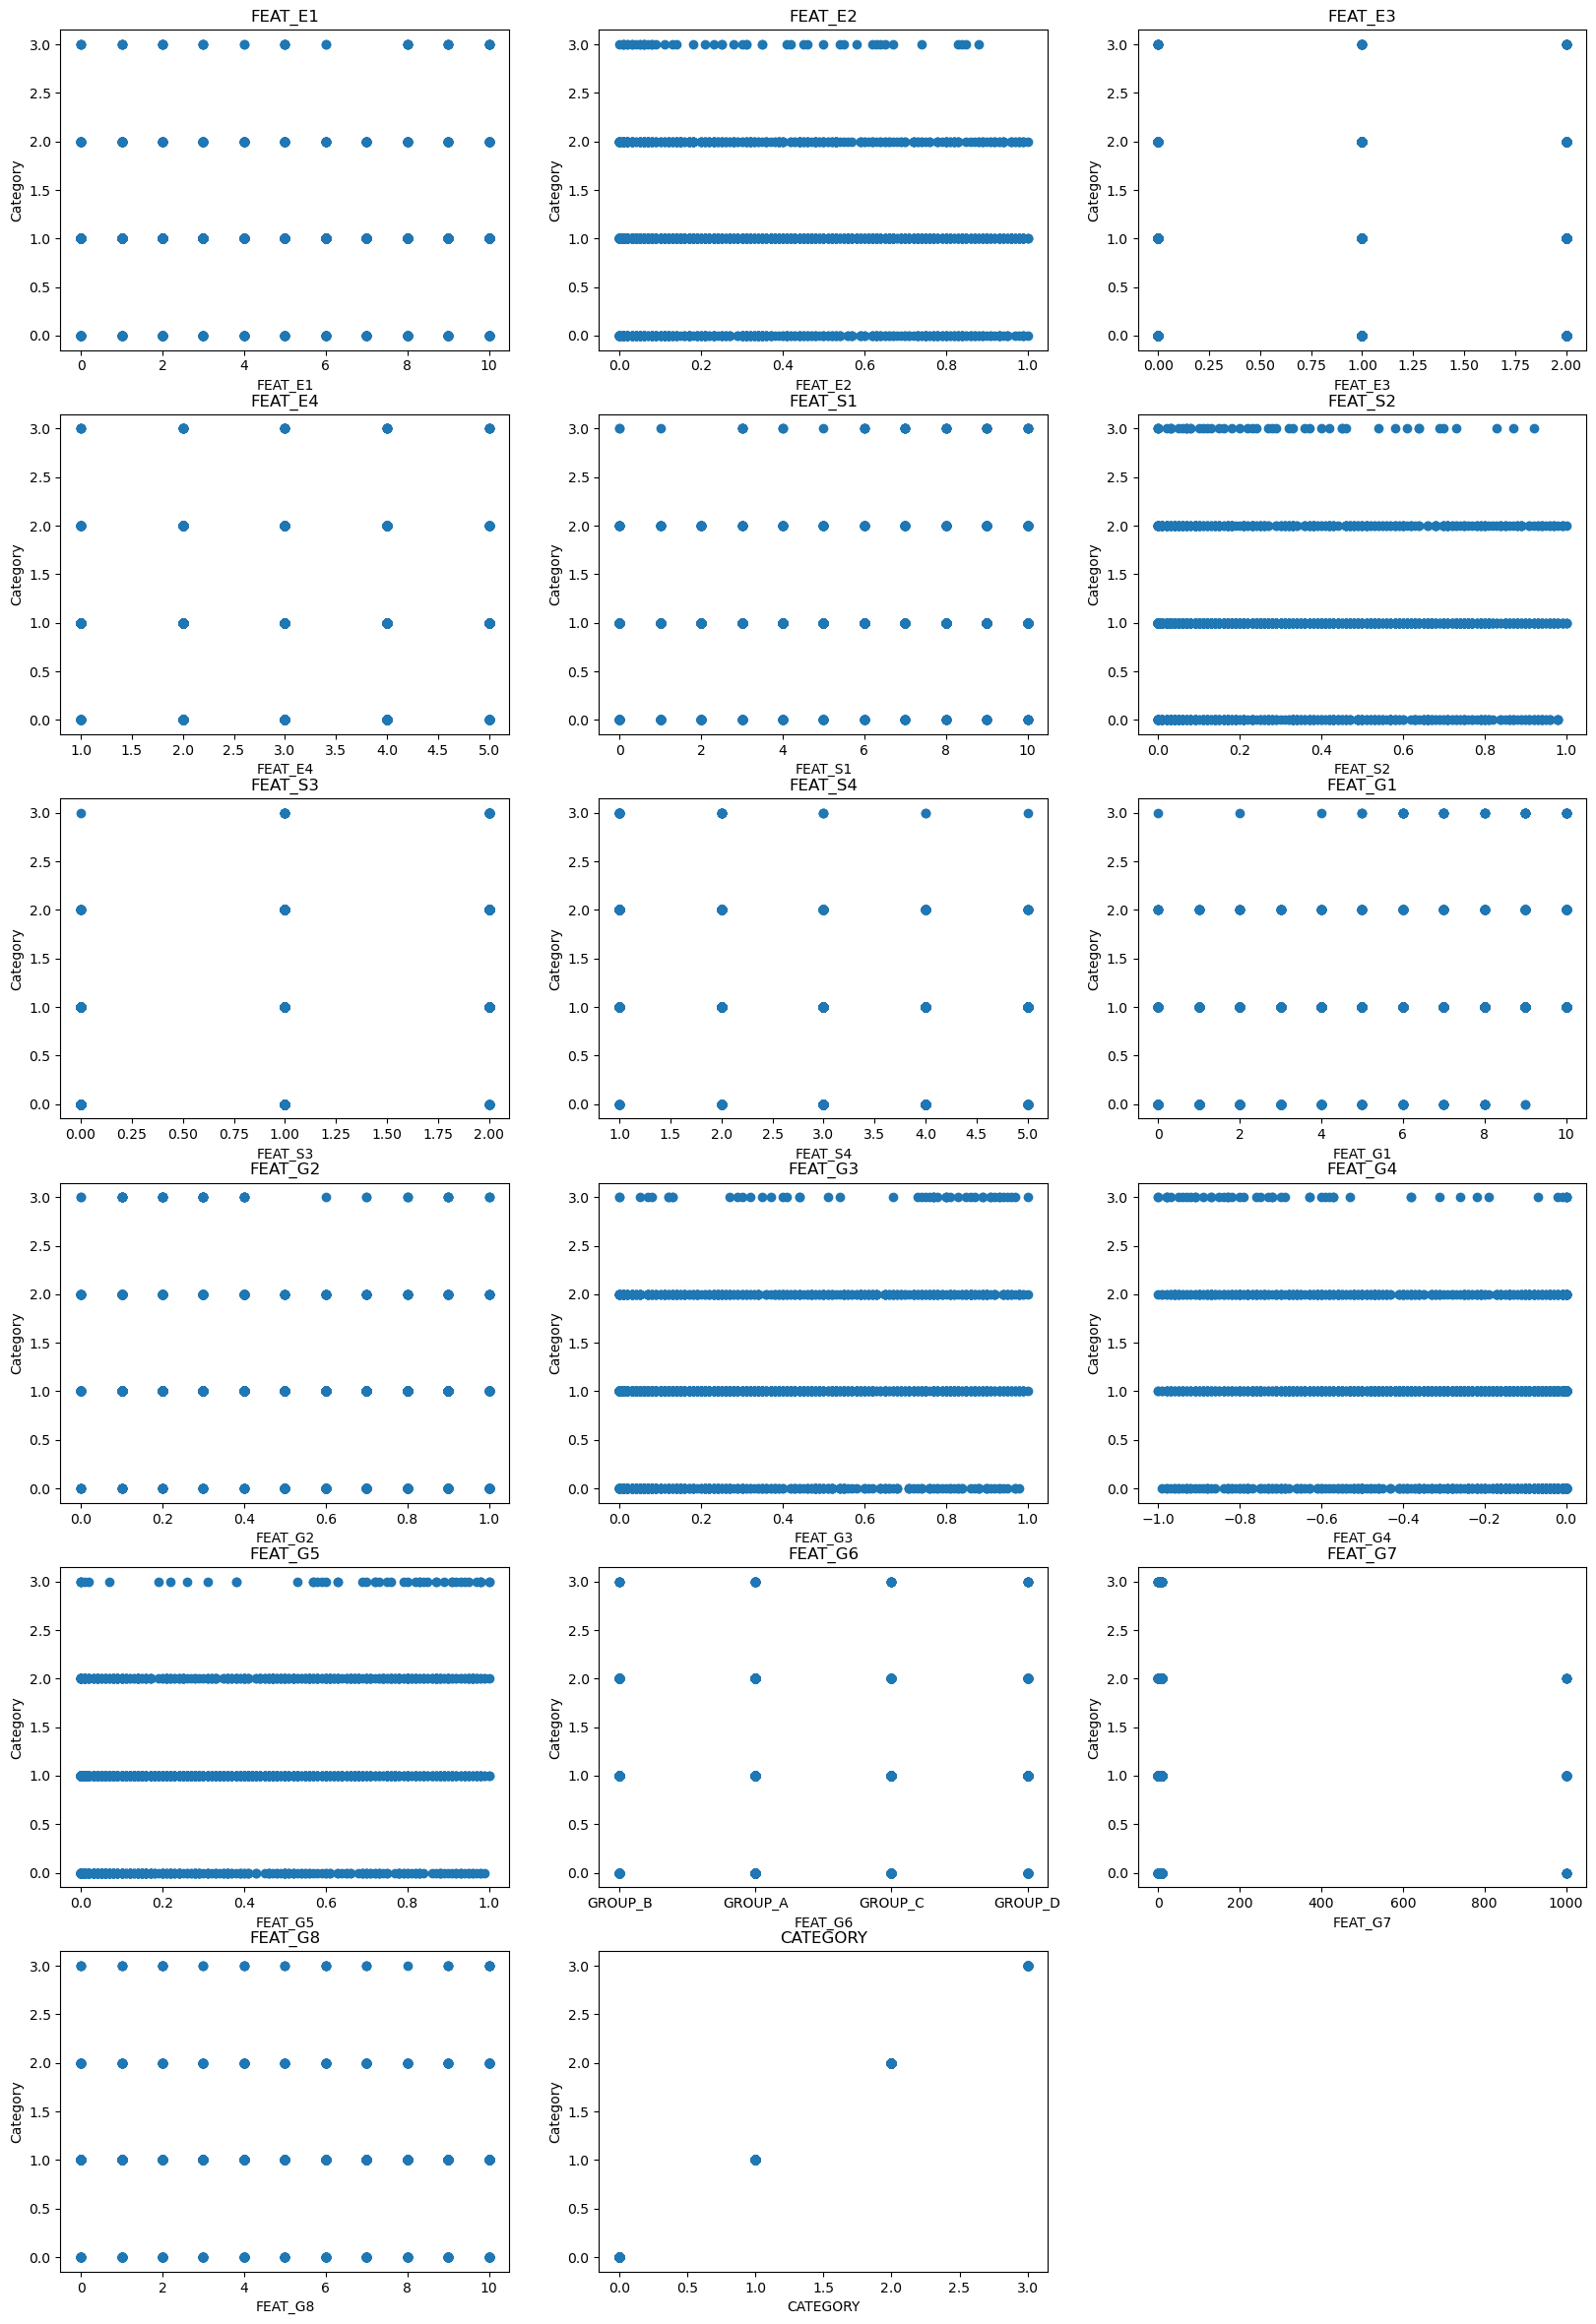

In [392]:
## Explore and visualize dataset features with the Category
import seaborn as sns

features = df_masterdata.columns
features.values
plt.figure(figsize=(20,60), facecolor='White')
plotnumber = 1
for feature in features.values:
    data = df_workingdata.copy()
    #if(feature == 'Date'):
        #continue
    ax= plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],df_workingdata['CATEGORY'])
    plt.xlabel(feature)
    plt.ylabel('Category')
    plt.title(feature)
    plotnumber+=1
plt.show

''' Few observations from above charts:
- FEAT_G7 -> if the value is 1000 or not around 0 , then it is not a Category 3 i.e ESG_Champion
- FEAT_S3 and FEAT_E3 looks similarly related to Category
- FEAT_E1 value is 7 or FEAT_E2 value is 1 , it is not category 3'''

In [393]:
### Step 2 : Data Preprocessing

In [394]:
# Handle missing values - 2 ways - one is to drop missing values and other is to drop the feature G8 if this does not contribute to accuracy
# we will test both and finalize later
df_workingdata.dropna(inplace=True)
df_workingdata
df_workingdata.isnull().sum()

FEAT_E1     0
FEAT_E2     0
FEAT_E3     0
FEAT_E4     0
FEAT_S1     0
FEAT_S2     0
FEAT_S3     0
FEAT_S4     0
FEAT_G1     0
FEAT_G2     0
FEAT_G3     0
FEAT_G4     0
FEAT_G5     0
FEAT_G6     0
FEAT_G7     0
FEAT_G8     0
CATEGORY    0
dtype: int64

In [395]:

## Label Encoding to convert non numerical data 

# GROUP_A -> 0
# GROUP_B -> 1
# GROUP_C -> 2
# GROUP_D -> 3

# Label Encoding - Using One hot Encoder for encoding categorical data of FEAT_G6

In [396]:
#Extracting X (Features) and Y (Target) data from dataset 
df_Y = df_workingdata['CATEGORY']
df_X = df_workingdata.drop(columns = 'CATEGORY')


In [397]:
# Label Encoding for target values using Pandas dummies function
df_Y = pd.get_dummies(df_Y, dtype = int)

df_Y =  df_Y.rename(columns={0:'CATEGORY_0', 1:'CATEGORY_1', 2:'CATEGORY_2', 3:'CATEGORY_3'})
df_Y

CATEGORY_0  CATEGORY_1  CATEGORY_2  CATEGORY_3
0              0           0           1           0
1              0           0           1           0
2              0           0           1           0
3              1           0           0           0
4              0           1           0           0
...          ...         ...         ...         ...
1994           0           1           0           0
1995           0           1           0           0
1996           1           0           0           0
1998           1           0           0           0
1999           1           0           0           0

[1816 rows x 4 columns]

In [398]:
# Label Encoding of Features using Pandas dummies function
df_X = pd.get_dummies(df_X, dtype = int)

df_X

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1994       10     0.63        1        2        9     0.67        0        4   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G5  FEAT_G7  FEAT_G8  \
0           9      0.2     0.16    -0.16     0.16        7      6.0   
1          10      0.4     0.03    -0.58     0.58        7      4.0   
2           5      0.1     0.00    -0.89     0.89        5     10.0   
3           1      0.3     0.97    -0.01     0.01        0      7.0   
4           4      0.9     0.47    -0.67     0.67        3      7.0   
...       ...      ...      ...      ...      ...      ...      ...   
1994        2      0.5     0.72    -0.26     0.26        6      7.0   
1995        2      0.2     0.71     0.00     0.00        1      3.0   
1996        1      0.7     0.15    -0.88     0.88        0      9.0   
1998        7      0.8     0.02    -0.28     0.28        4      8.0   
1999        2      0.6     0.31     0.00     0.00        2      2.0   

      FEAT_G6_GROUP_A  FEAT_G6_GROUP_B  FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  
0                   0                1                0                0  
1                   0                1                0                0  
2                   0                1                0                0  
3                   1                0                0                0  
4                   1                0                0                0  
...               ...              ...              ...              ...  
1994                1                0                0                0  
1995                1                0                0                0  
1996                1                0                0                0  
1998                1                0                0                0  
1999                1                0                0                0  

[1816 rows x 19 columns]

<Axes: >

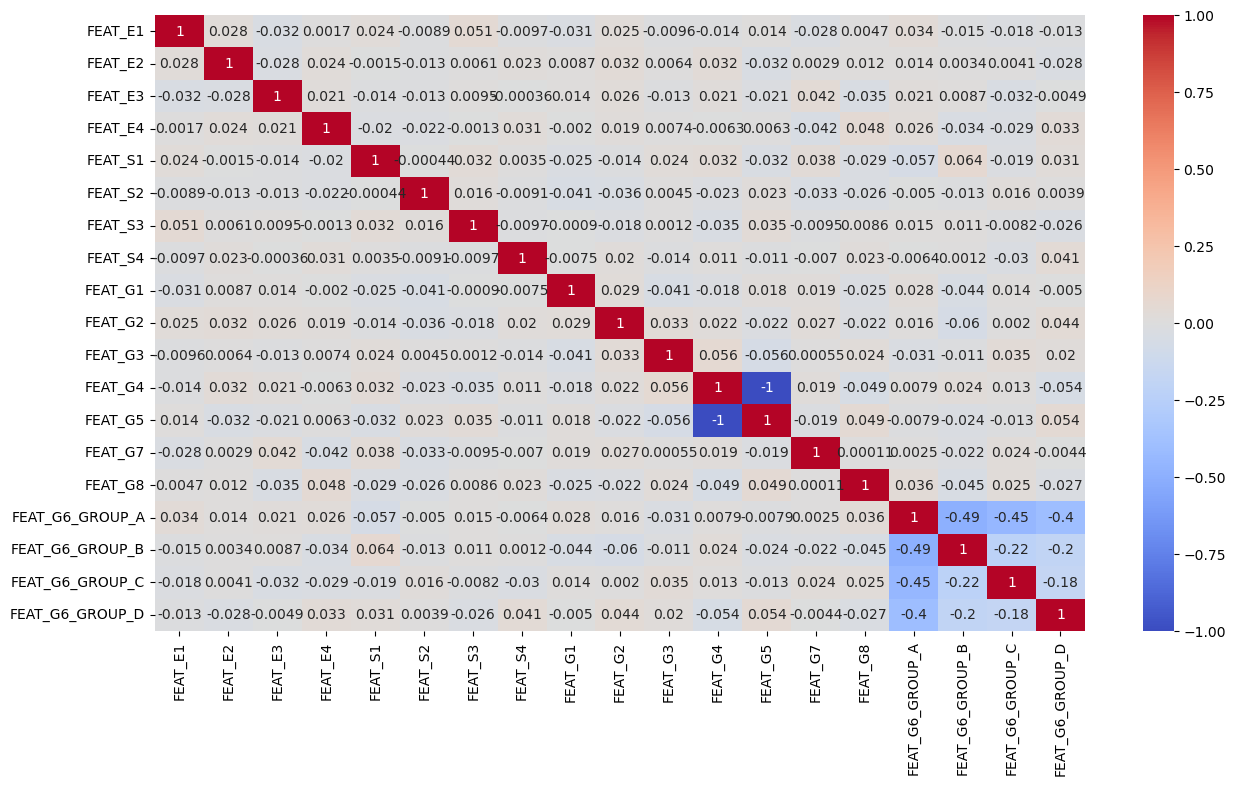

In [399]:
#Check correlations
import seaborn as sb
corr_matr = df_X.corr()
fig,ax = plt.subplots(figsize = (15,8))
sb.heatmap(corr_matr,annot=True,ax=ax, cmap='coolwarm')

In [400]:
# Drop column A to remove multicollinearity
df_X = df_X.drop(columns = 'FEAT_G6_GROUP_A')
df_X

# Drop one of the duplicate column - FEAT_G4 / FEAT_G5 from the Features Dataframe as well as working data
df_X = df_X.drop(columns = 'FEAT_G5')
df_X

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1994       10     0.63        1        2        9     0.67        0        4   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G7  FEAT_G8  FEAT_G6_GROUP_B  \
0           9      0.2     0.16    -0.16        7      6.0                1   
1          10      0.4     0.03    -0.58        7      4.0                1   
2           5      0.1     0.00    -0.89        5     10.0                1   
3           1      0.3     0.97    -0.01        0      7.0                0   
4           4      0.9     0.47    -0.67        3      7.0                0   
...       ...      ...      ...      ...      ...      ...              ...   
1994        2      0.5     0.72    -0.26        6      7.0                0   
1995        2      0.2     0.71     0.00        1      3.0                0   
1996        1      0.7     0.15    -0.88        0      9.0                0   
1998        7      0.8     0.02    -0.28        4      8.0                0   
1999        2      0.6     0.31     0.00        2      2.0                0   

      FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  
0                   0                0  
1                   0                0  
2                   0                0  
3                   0                0  
4                   0                0  
...               ...              ...  
1994                0                0  
1995                0                0  
1996                0                0  
1998                0                0  
1999                0                0  

[1816 rows x 17 columns]

<Axes: >

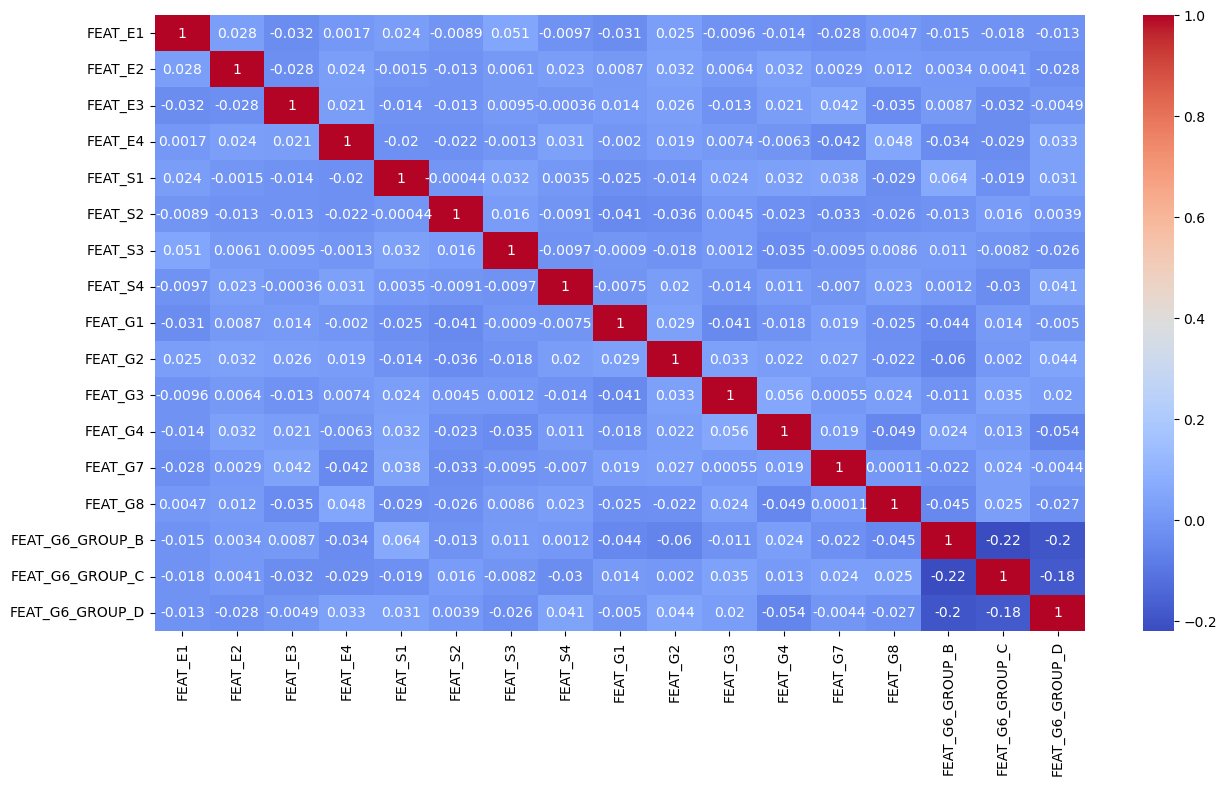

In [401]:
#Check correlations
import seaborn as sb
corr_matr = df_X.corr()
fig,ax = plt.subplots(figsize = (15,8))
sb.heatmap(corr_matr,annot=True,ax=ax, cmap='coolwarm')

In [402]:
df_Y

CATEGORY_0  CATEGORY_1  CATEGORY_2  CATEGORY_3
0              0           0           1           0
1              0           0           1           0
2              0           0           1           0
3              1           0           0           0
4              0           1           0           0
...          ...         ...         ...         ...
1994           0           1           0           0
1995           0           1           0           0
1996           1           0           0           0
1998           1           0           0           0
1999           1           0           0           0

[1816 rows x 4 columns]

In [403]:
df_workingdata = df_workingdata.drop(columns = 'FEAT_G5')
df_workingdata

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1994       10     0.63        1        2        9     0.67        0        4   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G6  FEAT_G7  FEAT_G8  CATEGORY  
0           9      0.2     0.16    -0.16  GROUP_B        7      6.0         2  
1          10      0.4     0.03    -0.58  GROUP_B        7      4.0         2  
2           5      0.1     0.00    -0.89  GROUP_B        5     10.0         2  
3           1      0.3     0.97    -0.01  GROUP_A        0      7.0         0  
4           4      0.9     0.47    -0.67  GROUP_A        3      7.0         1  
...       ...      ...      ...      ...      ...      ...      ...       ...  
1994        2      0.5     0.72    -0.26  GROUP_A        6      7.0         1  
1995        2      0.2     0.71     0.00  GROUP_A        1      3.0         1  
1996        1      0.7     0.15    -0.88  GROUP_A        0      9.0         0  
1998        7      0.8     0.02    -0.28  GROUP_A        4      8.0         0  
1999        2      0.6     0.31     0.00  GROUP_A        2      2.0         0  

[1816 rows x 16 columns]

In [404]:
df_workingdata['CATEGORY'].value_counts()

CATEGORY
1    1061
0     383
2     326
3      46
Name: count, dtype: int64

In [405]:
## Merge/Join/Concatenate working data frame to include dummy features of X

df_workingdata = pd.merge(df_X, df_workingdata, how='left')
#df_workingdata
df_workingdata = df_workingdata.drop(columns = 'FEAT_G6')
df_workingdata

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1811       10     0.63        1        2        9     0.67        0        4   
1812        3     0.00        2        5        4     0.79        1        2   
1813        2     0.59        1        4        1     0.86        1        5   
1814        0     0.33        0        3        0     0.03        0        2   
1815        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G7  FEAT_G8  FEAT_G6_GROUP_B  \
0           9      0.2     0.16    -0.16        7      6.0                1   
1          10      0.4     0.03    -0.58        7      4.0                1   
2           5      0.1     0.00    -0.89        5     10.0                1   
3           1      0.3     0.97    -0.01        0      7.0                0   
4           4      0.9     0.47    -0.67        3      7.0                0   
...       ...      ...      ...      ...      ...      ...              ...   
1811        2      0.5     0.72    -0.26        6      7.0                0   
1812        2      0.2     0.71     0.00        1      3.0                0   
1813        1      0.7     0.15    -0.88        0      9.0                0   
1814        7      0.8     0.02    -0.28        4      8.0                0   
1815        2      0.6     0.31     0.00        2      2.0                0   

      FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  CATEGORY  
0                   0                0         2  
1                   0                0         2  
2                   0                0         2  
3                   0                0         0  
4                   0                0         1  
...               ...              ...       ...  
1811                0                0         1  
1812                0                0         1  
1813                0                0         0  
1814                0                0         0  
1815                0                0         0  

[1816 rows x 18 columns]

In [406]:
# Create new Category columns corresponding to each category value / class in the data frame
df_workingdata['CATEGORY_0']=0
df_workingdata['CATEGORY_1']=0
df_workingdata['CATEGORY_2']=0
df_workingdata['CATEGORY_3']=0


df_workingdata.loc[(df_workingdata['CATEGORY']==0), 'CATEGORY_0']=1
df_workingdata.loc[(df_workingdata['CATEGORY']==1), 'CATEGORY_1']=1
df_workingdata.loc[(df_workingdata['CATEGORY']==2), 'CATEGORY_2']=1
df_workingdata.loc[(df_workingdata['CATEGORY']==3), 'CATEGORY_3']=1
df_workingdata

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1811       10     0.63        1        2        9     0.67        0        4   
1812        3     0.00        2        5        4     0.79        1        2   
1813        2     0.59        1        4        1     0.86        1        5   
1814        0     0.33        0        3        0     0.03        0        2   
1815        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  ...  FEAT_G7  FEAT_G8  FEAT_G6_GROUP_B  \
0           9      0.2  ...        7      6.0                1   
1          10      0.4  ...        7      4.0                1   
2           5      0.1  ...        5     10.0                1   
3           1      0.3  ...        0      7.0                0   
4           4      0.9  ...        3      7.0                0   
...       ...      ...  ...      ...      ...              ...   
1811        2      0.5  ...        6      7.0                0   
1812        2      0.2  ...        1      3.0                0   
1813        1      0.7  ...        0      9.0                0   
1814        7      0.8  ...        4      8.0                0   
1815        2      0.6  ...        2      2.0                0   

      FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  CATEGORY  CATEGORY_0  CATEGORY_1  \
0                   0                0         2           0           0   
1                   0                0         2           0           0   
2                   0                0         2           0           0   
3                   0                0         0           1           0   
4                   0                0         1           0           1   
...               ...              ...       ...         ...         ...   
1811                0                0         1           0           1   
1812                0                0         1           0           1   
1813                0                0         0           1           0   
1814                0                0         0           1           0   
1815                0                0         0           1           0   

      CATEGORY_2  CATEGORY_3  
0              1           0  
1              1           0  
2              1           0  
3              0           0  
4              0           0  
...          ...         ...  
1811           0           0  
1812           0           0  
1813           0           0  
1814           0           0  
1815           0           0  

[1816 rows x 22 columns]

In [407]:
df_workingdata.isnull().any()

df_Y

CATEGORY_0  CATEGORY_1  CATEGORY_2  CATEGORY_3
0              0           0           1           0
1              0           0           1           0
2              0           0           1           0
3              1           0           0           0
4              0           1           0           0
...          ...         ...         ...         ...
1994           0           1           0           0
1995           0           1           0           0
1996           1           0           0           0
1998           1           0           0           0
1999           1           0           0           0

[1816 rows x 4 columns]

In [408]:
 df_Y = df_workingdata[['CATEGORY', 'CATEGORY_0','CATEGORY_1','CATEGORY_2','CATEGORY_3']]

Y = df_Y[['CATEGORY']]
Y

CATEGORY
0            2
1            2
2            2
3            0
4            1
...        ...
1811         1
1812         1
1813         0
1814         0
1815         0

[1816 rows x 1 columns]

In [409]:
### Step 3 - Train Test Split
from sklearn.model_selection import train_test_split

## Train Test Split - Method -1

# Split tinto two to get a training set (70%) and a test set (30%)
train_set, test_set=train_test_split(df_workingdata, test_size=0.3, random_state=24, stratify = Y)

train_set["CATEGORY"].value_counts()

CATEGORY
1    743
0    268
2    228
3     32
Name: count, dtype: int64

In [410]:
test_set["CATEGORY"].value_counts()

CATEGORY
1    318
0    115
2     98
3     14
Name: count, dtype: int64

In [411]:
## Train Test Split - Method -2 Split  using stratify to preserve the balance / proportion of class categories in the data split
# Split tinto two to get a training set (70%) and a test set (30%)
train_x, test_x, train_y, test_y =train_test_split(df_X, df_Y,  test_size=0.3, random_state=24 , stratify = Y)
train_x,train_y

(      FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
 1233        9     0.10        0        3       10     0.37        1        3   
 1029        1     0.16        1        2        5     0.03        1        3   
 946         5     0.23        0        3       10     0.78        1        3   
 103         8     0.03        1        4        9     0.11        2        4   
 1221        1     0.01        2        2        9     0.05        0        2   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 1183        6     0.32        1        1        8     0.00        1        2   
 1795        9     0.42        1        3        5     0.08        2        5   
 913         5     0.23        1        4        6     0.17        0        5   
 783         3     0.35        1        3        7     0.45        2        1   
 1650        0     0.13        2        2        5     0.63        1        2   
 
       FEAT_G1  FEAT_G2  F

In [412]:
### Step 4 - Feature Scaling
# Use Scalers on the x part of the Training Set
from sklearn.preprocessing import StandardScaler
scaler_x =  StandardScaler().fit(train_x)

train_x_scaled=scaler_x.transform(train_x)
test_x_scaled = scaler_x.transform(test_x)


In [413]:

features = train_x.columns
features.values
train_x_scaled_df = pd.DataFrame(columns=features, data=train_x_scaled)
train_x_scaled_df

FEAT_E1   FEAT_E2   FEAT_E3   FEAT_E4   FEAT_S1   FEAT_S2   FEAT_S3  \
0     1.282924 -0.803138 -1.387606  0.040351  1.571504  0.155101 -0.016269   
1    -1.227134 -0.602274  0.003283 -0.773720 -0.031017 -1.013608 -0.016269   
2     0.027895 -0.367934 -1.387606  0.040351  1.571504  1.564428 -0.016269   
3     0.969166 -1.037479  0.003283  0.854422  1.251000 -0.738618  1.362264   
4    -1.227134 -1.104433  1.394172 -0.773720  1.251000 -0.944861 -1.394802   
...        ...       ...       ...       ...       ...       ...       ...   
1266  0.341652 -0.066638  0.003283 -1.587791  0.930496 -1.116730 -0.016269   
1267  1.282924  0.268134  0.003283  0.040351 -0.031017 -0.841739  1.362264   
1268  0.027895 -0.367934  0.003283  0.854422  0.289488 -0.532375 -1.394802   
1269 -0.599619  0.033793  0.003283  0.040351  0.609992  0.430092  1.362264   
1270 -1.540891 -0.702706  1.394172 -0.773720 -0.031017  1.048820 -0.016269   

       FEAT_S4   FEAT_G1   FEAT_G2   FEAT_G3   FEAT_G4   FEAT_G7   FEAT_G8  \
0     0.029083 -0.011407  0.310435 -1.057221 -1.975549 -0.170037 -1.227064   
1     0.029083  0.310764 -0.368675 -0.187494 -0.058326 -0.218978 -1.227064   
2     0.029083  1.277277 -0.368675 -0.722711 -0.899214 -0.191788  1.233841   
3     0.832652  0.955106  1.329100 -0.990319 -0.798307 -0.186351  0.926228   
4    -0.774486 -0.655748 -1.387340 -0.856515  0.883468 -0.164599  0.926228   
...        ...       ...       ...       ...       ...       ...       ...   
1266 -0.774486  0.310764 -0.708230 -0.455103 -0.899214 -0.218978  1.233841   
1267  1.636221 -0.333577 -1.047785  0.983292  0.748926 -0.213540 -0.919451   
1268  1.636221 -0.011407  0.649990  1.618862  0.580748 -0.186351  1.233841   
1269 -1.578056  1.277277 -1.387340 -0.689260  1.118916 -0.164599 -0.919451   
1270 -0.774486  0.310764  0.649990  0.314271  0.782561 -0.175475  0.618615   

      FEAT_G6_GROUP_B  FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  
0           -0.492366        -0.463794         2.486120  
1            2.031010        -0.463794        -0.402233  
2           -0.492366        -0.463794        -0.402233  
3            2.031010        -0.463794        -0.402233  
4           -0.492366        -0.463794        -0.402233  
...               ...              ...              ...  
1266        -0.492366        -0.463794        -0.402233  
1267        -0.492366        -0.463794        -0.402233  
1268         2.031010        -0.463794        -0.402233  
1269        -0.492366        -0.463794        -0.402233  
1270         2.031010        -0.463794        -0.402233  

[1271 rows x 17 columns]

In [414]:
### Step 5 - Model Training


In [415]:
train_y_ALL = train_y[['CATEGORY']]
train_y_0 = train_y[['CATEGORY_0']]
train_y_1 = train_y[['CATEGORY_1']]
train_y_2 = train_y[['CATEGORY_2']]
train_y_3 = train_y[['CATEGORY_3']]

train_x, train_y_ALL

(      FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
 1233        9     0.10        0        3       10     0.37        1        3   
 1029        1     0.16        1        2        5     0.03        1        3   
 946         5     0.23        0        3       10     0.78        1        3   
 103         8     0.03        1        4        9     0.11        2        4   
 1221        1     0.01        2        2        9     0.05        0        2   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 1183        6     0.32        1        1        8     0.00        1        2   
 1795        9     0.42        1        3        5     0.08        2        5   
 913         5     0.23        1        4        6     0.17        0        5   
 783         3     0.35        1        3        7     0.45        2        1   
 1650        0     0.13        2        2        5     0.63        1        2   
 
       FEAT_G1  FEAT_G2  F

In [416]:
train_y_ALL.values.ravel()

array([1, 1, 2, ..., 1, 3, 1])

In [417]:
test_y_ALL = test_y[['CATEGORY']]
test_y_0 = test_y[['CATEGORY_0']]
test_y_1 = test_y[['CATEGORY_1']]
test_y_2 = test_y[['CATEGORY_2']]
test_y_3 = test_y[['CATEGORY_3']]

test_y_ALL.values.ravel()

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       3, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 2, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 3, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 3, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1,
       2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2,

In [418]:
###Step-5/6 Modelling - Model(s) Training and Evaluation

In [419]:
## Model 1a - Basic Logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l2', C= 1, solver = 'lbfgs', multi_class = 'multinomial')
model.fit(train_x_scaled, train_y_ALL.values.ravel())

LogisticRegression(C=1, multi_class='multinomial')

In [420]:
# Check accuracy for test data set
model.score(test_x_scaled, test_y_ALL.values.ravel())

0.8073394495412844

In [421]:
train_x_scaled_df

FEAT_E1   FEAT_E2   FEAT_E3   FEAT_E4   FEAT_S1   FEAT_S2   FEAT_S3  \
0     1.282924 -0.803138 -1.387606  0.040351  1.571504  0.155101 -0.016269   
1    -1.227134 -0.602274  0.003283 -0.773720 -0.031017 -1.013608 -0.016269   
2     0.027895 -0.367934 -1.387606  0.040351  1.571504  1.564428 -0.016269   
3     0.969166 -1.037479  0.003283  0.854422  1.251000 -0.738618  1.362264   
4    -1.227134 -1.104433  1.394172 -0.773720  1.251000 -0.944861 -1.394802   
...        ...       ...       ...       ...       ...       ...       ...   
1266  0.341652 -0.066638  0.003283 -1.587791  0.930496 -1.116730 -0.016269   
1267  1.282924  0.268134  0.003283  0.040351 -0.031017 -0.841739  1.362264   
1268  0.027895 -0.367934  0.003283  0.854422  0.289488 -0.532375 -1.394802   
1269 -0.599619  0.033793  0.003283  0.040351  0.609992  0.430092  1.362264   
1270 -1.540891 -0.702706  1.394172 -0.773720 -0.031017  1.048820 -0.016269   

       FEAT_S4   FEAT_G1   FEAT_G2   FEAT_G3   FEAT_G4   FEAT_G7   FEAT_G8  \
0     0.029083 -0.011407  0.310435 -1.057221 -1.975549 -0.170037 -1.227064   
1     0.029083  0.310764 -0.368675 -0.187494 -0.058326 -0.218978 -1.227064   
2     0.029083  1.277277 -0.368675 -0.722711 -0.899214 -0.191788  1.233841   
3     0.832652  0.955106  1.329100 -0.990319 -0.798307 -0.186351  0.926228   
4    -0.774486 -0.655748 -1.387340 -0.856515  0.883468 -0.164599  0.926228   
...        ...       ...       ...       ...       ...       ...       ...   
1266 -0.774486  0.310764 -0.708230 -0.455103 -0.899214 -0.218978  1.233841   
1267  1.636221 -0.333577 -1.047785  0.983292  0.748926 -0.213540 -0.919451   
1268  1.636221 -0.011407  0.649990  1.618862  0.580748 -0.186351  1.233841   
1269 -1.578056  1.277277 -1.387340 -0.689260  1.118916 -0.164599 -0.919451   
1270 -0.774486  0.310764  0.649990  0.314271  0.782561 -0.175475  0.618615   

      FEAT_G6_GROUP_B  FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  
0           -0.492366        -0.463794         2.486120  
1            2.031010        -0.463794        -0.402233  
2           -0.492366        -0.463794        -0.402233  
3            2.031010        -0.463794        -0.402233  
4           -0.492366        -0.463794        -0.402233  
...               ...              ...              ...  
1266        -0.492366        -0.463794        -0.402233  
1267        -0.492366        -0.463794        -0.402233  
1268         2.031010        -0.463794        -0.402233  
1269        -0.492366        -0.463794        -0.402233  
1270         2.031010        -0.463794        -0.402233  

[1271 rows x 17 columns]

In [422]:
y_test_predicted = model.predict(test_x_scaled)
y_test_predicted

array([0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0,
       3, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 3, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2,

In [423]:
#Model 1a Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_y_ALL.values.ravel(), y_test_predicted))

              precision    recall  f1-score   support

           0       0.84      0.76      0.79       115
           1       0.84      0.86      0.85       318
           2       0.68      0.72      0.70        98
           3       0.89      0.57      0.70        14

    accuracy                           0.81       545
   macro avg       0.81      0.73      0.76       545
weighted avg       0.81      0.81      0.81       545



In [424]:
#Model 1a Print Coefficients
print("Coefficients:", model.coef_)

Coefficients: [[ 4.29439116e-02  1.04101336e-01 -1.65680660e-01  2.52862902e-02
  -1.55526208e+00  1.41815087e-01 -2.21340253e+00  1.74331985e+00
  -3.04733624e+00  1.89576128e+00 -1.70024956e+00  1.66261272e+00
   1.83872674e-01 -9.91540945e-02 -5.13670476e-02  1.00167192e-01
  -7.65587513e-03]
 [-4.23127369e-02  1.39060548e-01 -9.35744936e-03 -1.94109703e-02
  -2.70771749e-01  4.43664623e-02 -9.75225532e-01  1.07492260e+00
  -5.43115504e-01  4.48261349e-01 -8.21977283e-01  7.53950084e-01
   2.35716146e-01 -7.40973480e-04 -3.37593508e-02 -7.83771282e-02
   2.40625878e-02]
 [ 2.32219664e-04  8.85451770e-03  6.05365738e-02 -8.17457671e-02
   6.55092478e-01 -3.79487069e-03  8.17275267e-01 -5.72536717e-01
   1.19930654e+00 -8.95512678e-01  7.64499182e-01 -6.62481388e-01
   2.07425897e-02  1.76524253e-01  1.31485999e-01  1.10809061e-02
  -3.87496369e-02]
 [-8.63394416e-04 -2.52016401e-01  1.14501536e-01  7.58704472e-02
   1.17094135e+00 -1.82386679e-01  2.37135280e+00 -2.24570574e+00
   2.

In [425]:
#Model 1b : Logistic Regression - One Vs All(Ovr) - 4 Classifiers one for each class/category

train_y_ALL = train_y[['CATEGORY']]
train_y_0 = train_y[['CATEGORY_0']]
train_y_1 = train_y[['CATEGORY_1']]
train_y_2 = train_y[['CATEGORY_2']]
train_y_3 = train_y[['CATEGORY_3']]

# Instantiate the  4 models for each Class ( Category 0, Category 1, Category 2, Category 3) 
logreg_model_0=LogisticRegression(solver='lbfgs', multi_class='auto')
logreg_model_1=LogisticRegression(solver='lbfgs', multi_class='auto')
logreg_model_2=LogisticRegression(solver='lbfgs', multi_class='auto')
logreg_model_3=LogisticRegression(solver='lbfgs', multi_class='auto')

# FIT the 4 models for each Class ( Category 0, Category 1, Category 2, Category 3)
logreg_model_0.fit(train_x_scaled, train_y_0.values.ravel())
logreg_model_1.fit(train_x_scaled, train_y_1.values.ravel())
logreg_model_2.fit(train_x_scaled, train_y_2.values.ravel())
logreg_model_3.fit(train_x_scaled, train_y_3.values.ravel())

LogisticRegression()

In [426]:
### Determine the significant features by analying the coefficients for Model 1a and Model 1b

In [427]:
# Print Classification Report for logreg_model_0
y_test_pred=logreg_model_0.predict(test_x_scaled)
y_test_pred

from sklearn.metrics import classification_report
print(classification_report(test_y_0.values.ravel(), y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       430
           1       0.84      0.76      0.79       115

    accuracy                           0.92       545
   macro avg       0.89      0.86      0.87       545
weighted avg       0.92      0.92      0.92       545



In [428]:
# Check accuracy for test data set for each of the classifier - Classifier 0
logreg_model_0.score(test_x_scaled, test_y_0.values.ravel())

0.9174311926605505

In [429]:
print("Coefficients:", logreg_model_0.coef_)

Coefficients: [[ 0.08606745 -0.02674551 -0.16649072  0.04393116 -1.33330901  0.09728009
  -1.30222717  0.72186759 -2.59327626  1.50579997 -0.93529688  0.9619725
  -0.04814201 -0.1024823  -0.02467316  0.17507538 -0.03346525]]


In [430]:
np.argmax(logreg_model_0.coef_)

9

In [431]:
print("Coefficients:", model.coef_[0])

Coefficients: [ 0.04294391  0.10410134 -0.16568066  0.02528629 -1.55526208  0.14181509
 -2.21340253  1.74331985 -3.04733624  1.89576128 -1.70024956  1.66261272
  0.18387267 -0.09915409 -0.05136705  0.10016719 -0.00765588]


In [432]:
np.argmax(model.coef_[0])

9

In [433]:
# Print Classification Report for logreg_model_1
from sklearn.metrics import classification_report
y_test_pred_1=logreg_model_1.predict(test_x_scaled)
y_test_pred_1
print(classification_report(test_y_1.values.ravel(), y_test_pred_1))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39       227
           1       0.62      0.80      0.70       318

    accuracy                           0.59       545
   macro avg       0.57      0.55      0.54       545
weighted avg       0.58      0.59      0.57       545



In [434]:
# Check accuracy for test data set for each of the classifier - Classifier 1
logreg_model_1.score(test_x_scaled, test_y_1.values.ravel())

0.5944954128440367

In [435]:
print("Coefficients:", logreg_model_1.coef_)

Coefficients: [[ 0.01051491  0.10509671  0.00174463  0.00816295  0.13457637 -0.04137585
  -0.08419267  0.27822206  0.37308743 -0.08108282 -0.14582331  0.13339093
   0.07101994 -0.02913054 -0.06589592 -0.14045694  0.03657711]]


In [436]:
np.argmax(logreg_model_1.coef_)

8

In [437]:
print("Coefficients:", model.coef_[1])

Coefficients: [-4.23127369e-02  1.39060548e-01 -9.35744936e-03 -1.94109703e-02
 -2.70771749e-01  4.43664623e-02 -9.75225532e-01  1.07492260e+00
 -5.43115504e-01  4.48261349e-01 -8.21977283e-01  7.53950084e-01
  2.35716146e-01 -7.40973480e-04 -3.37593508e-02 -7.83771282e-02
  2.40625878e-02]


In [438]:
np.argmax(model.coef_[1])

7

In [439]:
# Print Classification Report for logreg_model_2
y_test_pred_2=logreg_model_2.predict(test_x_scaled)
y_test_pred_2
print(classification_report(test_y_2.values.ravel(), y_test_pred_2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       447
           1       0.73      0.54      0.62        98

    accuracy                           0.88       545
   macro avg       0.82      0.75      0.77       545
weighted avg       0.87      0.88      0.87       545



In [440]:
# Check accuracy for test data set for each of the classifier - Classifier 2
logreg_model_2.score(test_x_scaled, test_y_2.values.ravel())

0.8807339449541285

In [441]:
print("Coefficients:", logreg_model_2.coef_)

Coefficients: [[ 0.01622716 -0.08466705  0.02895745 -0.01375728  0.51176407 -0.00954384
   1.02686286 -0.90831874  0.98851399 -0.92629546  0.86965362 -0.8075876
  -0.05398597  0.15639606  0.1580907   0.00324668 -0.09590354]]


In [442]:
np.argmax(logreg_model_2.coef_)

6

In [443]:
print("Coefficients:", model.coef_[2])

Coefficients: [ 2.32219664e-04  8.85451770e-03  6.05365738e-02 -8.17457671e-02
  6.55092478e-01 -3.79487069e-03  8.17275267e-01 -5.72536717e-01
  1.19930654e+00 -8.95512678e-01  7.64499182e-01 -6.62481388e-01
  2.07425897e-02  1.76524253e-01  1.31485999e-01  1.10809061e-02
 -3.87496369e-02]


In [444]:
np.argmax(model.coef_[2])

8

In [445]:
# Print Classification Report for logreg_model_3
y_test_pred_3=logreg_model_3.predict(test_x_scaled)
print(classification_report(test_y_3.values.ravel(), y_test_pred_3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       531
           1       0.89      0.57      0.70        14

    accuracy                           0.99       545
   macro avg       0.94      0.78      0.84       545
weighted avg       0.99      0.99      0.99       545



In [446]:
# Check accuracy for test data set for each of the classifier - Classifier 3
logreg_model_3.score(test_x_scaled, test_y_3.values.ravel())

0.9871559633027523

In [447]:
print("Coefficients:", logreg_model_3.coef_)

Coefficients: [[ 0.00432028 -0.28340278  0.05036941  0.20779616  0.70880957 -0.2168249
   1.95536859 -2.02700287  1.5931651  -0.83927237  1.26594728 -1.39046098
  -0.45992234 -0.23131557 -0.1279912  -0.06508353  0.02422324]]


In [448]:
np.argmax(logreg_model_3.coef_)

6

In [449]:
print("Coefficients:", model.coef_[3])

Coefficients: [-8.63394416e-04 -2.52016401e-01  1.14501536e-01  7.58704472e-02
  1.17094135e+00 -1.82386679e-01  2.37135280e+00 -2.24570574e+00
  2.39114520e+00 -1.44850995e+00  1.75772766e+00 -1.75408141e+00
 -4.40331410e-01 -7.66291850e-02 -4.63596010e-02 -3.28709702e-02
  2.23429241e-02]


In [450]:
np.argmax(model.coef_[3])

8

In [451]:
# Print Confusion Metrics for Model 1b
# Reference - ICMA Lecture Code Files by Dr Mininder Sethi

In [452]:
from sklearn import metrics
import seaborn as sn

y_test_pred=logreg_model_0.predict(test_x_scaled)
cm_0 = metrics.confusion_matrix(test_y_0, y_test_pred)  
print(cm_0)


[[413  17]
 [ 28  87]]


Text(0.5, 44.722222222222186, 'Predicted')

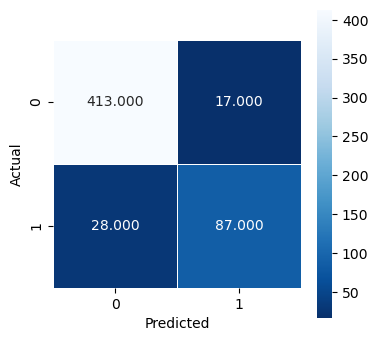

In [453]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_0,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [454]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_pred=logreg_model_1.predict(test_x_scaled)
cm_1=confusion_matrix(test_y_1, y_test_pred)  
print(cm_1)

[[ 70 157]
 [ 64 254]]


Text(0.5, 44.722222222222186, 'Predicted')

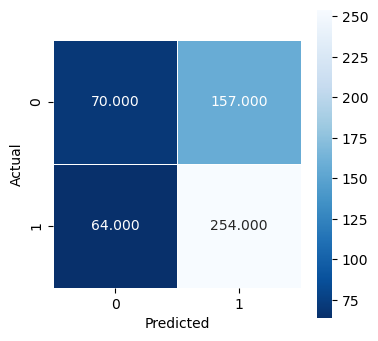

In [455]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_1,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [456]:
'''scaler_x =  StandardScaler().fit(train_x)
train_x_scaled=scaler_x.transform(train_x)
train_x_scaled
# Use Scalers on the x part of the Training Set '''

'scaler_x =  StandardScaler().fit(train_x)\ntrain_x_scaled=scaler_x.transform(train_x)\ntrain_x_scaled\n# Use Scalers on the x part of the Training Set '

In [457]:
#Model 1c - Logistic Regression - Multiclass Polynomial - One Versus Rest (Ovr)

from sklearn.preprocessing import PolynomialFeatures

order=2
polynomial_features=PolynomialFeatures(degree=order, include_bias=False)
scaler_x_poly =  polynomial_features.fit(train_x_scaled)
train_x_scaled_poly =scaler_x_poly.transform(train_x_scaled)
test_x_scaled_poly  = scaler_x_poly.transform(test_x_scaled)


In [458]:
train_y_ALL = train_y[['CATEGORY']]
train_y_0 = train_y[['CATEGORY_0']]
train_y_1 = train_y[['CATEGORY_1']]
train_y_2 = train_y[['CATEGORY_2']]
train_y_3 = train_y[['CATEGORY_3']]
                                            
logreg_model_poly_0=LogisticRegression(solver='lbfgs', max_iter=200 , multi_class='auto')
logreg_model_poly_1=LogisticRegression(solver='lbfgs', max_iter=200 ,multi_class='auto')
logreg_model_poly_2=LogisticRegression(solver='lbfgs', max_iter=200 ,multi_class='auto')
logreg_model_poly_3=LogisticRegression(solver='lbfgs', max_iter=200 ,multi_class='auto')

logreg_model_poly_0.fit(train_x_scaled_poly, train_y_0.values.ravel())
logreg_model_poly_1.fit(train_x_scaled_poly, train_y_1.values.ravel())
logreg_model_poly_2.fit(train_x_scaled_poly, train_y_2.values.ravel())
logreg_model_poly_3.fit(train_x_scaled_poly, train_y_3.values.ravel())


LogisticRegression(max_iter=200)

In [459]:
# Check accuracy for test data set for each of the classifier
# Classifier 0
logreg_model_poly_0.score(test_x_scaled_poly, test_y_0.values.ravel())

0.9284403669724771

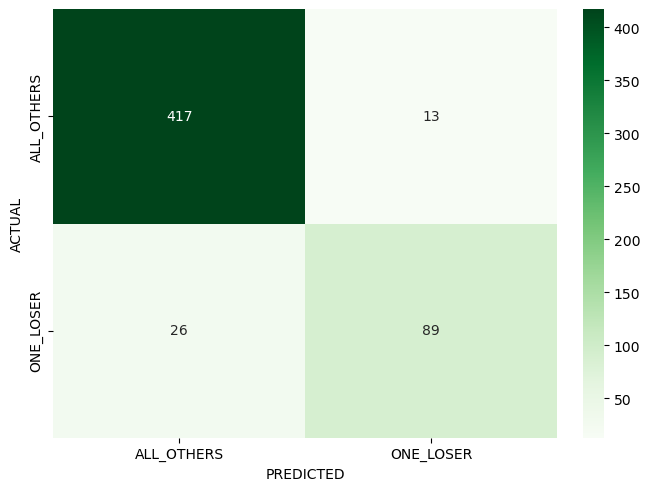

In [460]:
#Print Confusion Metrics - logreg_model_poly_0 
# Reference - ICMA Lecture Code Files by Dr Mininder Sethi
y_test_pred=logreg_model_poly_0.predict(test_x_scaled_poly)
cm_poly_0 = metrics.confusion_matrix(test_y_0, y_test_pred)  

labels_ESG = ['ALL_OTHERS','ONE_LOSER']
df_cm=pd.DataFrame(cm_poly_0, columns=labels_ESG, index=labels_ESG)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'
fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm, ax=ax, cmap="Greens", annot=True,  fmt='g')

In [461]:
# Check accuracy for test data set for each of the classifier
# Classifier 1
logreg_model_poly_1.score(test_x_scaled_poly, test_y_1.values.ravel())

0.7908256880733945

Text(0.5, 44.722222222222186, 'Predicted')

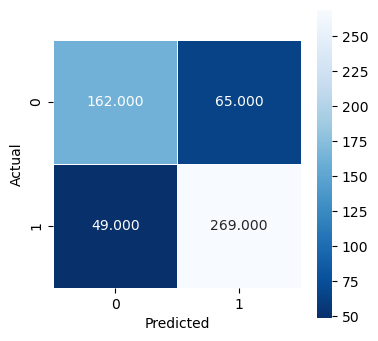

In [462]:
#Print Confusion Metrics - logreg_model_poly_1
y_test_pred=logreg_model_poly_1.predict(test_x_scaled_poly)
cm_poly_1 = metrics.confusion_matrix(test_y_1, y_test_pred)  
#print(cm_poly_1)

plt.figure(figsize=(4,4))
sns.heatmap(cm_poly_1,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [463]:
# Check accuracy for test data set for each of the classifier
# Classifier 2
logreg_model_poly_2.score(test_x_scaled_poly, test_y_2.values.ravel())

0.8642201834862385

Text(0.5, 44.722222222222186, 'Predicted')

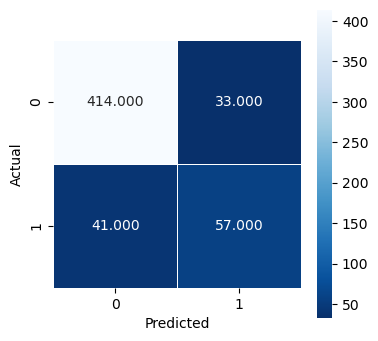

In [464]:
#Print Confusion Metrics - logreg_model_poly_2
y_test_pred=logreg_model_poly_2.predict(test_x_scaled_poly)
cm_poly_2 = metrics.confusion_matrix(test_y_2, y_test_pred)  
#print(cm_poly_2)
plt.figure(figsize=(4,4))
sns.heatmap(cm_poly_2,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')

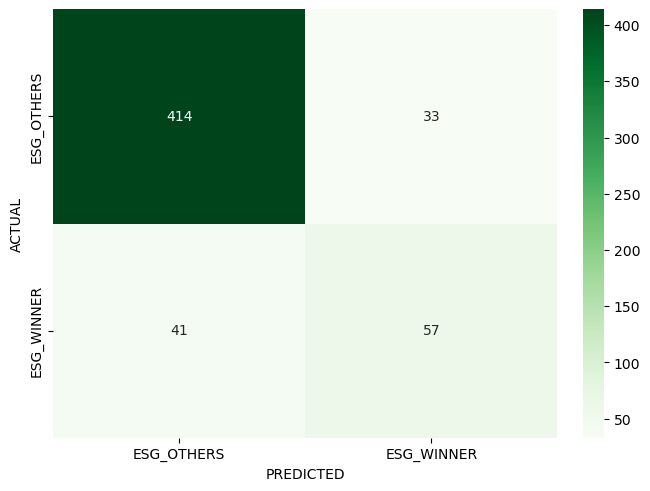

In [465]:
#Print Confusion Metrics - logreg_model_poly_2
# Reference - ICMA Lecture Code Files by Dr Mininder Sethi
y_test_pred=logreg_model_poly_2.predict(test_x_scaled_poly)
cm_poly_2 = metrics.confusion_matrix(test_y_2, y_test_pred)  
labels_ESG = ['ESG_OTHERS','ESG_WINNER']

df_cm=pd.DataFrame(cm_poly_2, columns=labels_ESG, index=labels_ESG)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'

fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm, ax=ax, cmap="Greens", annot=True,  fmt='g')

In [466]:
# Check accuracy for test data set for each of the classifier - Classifier 3
logreg_model_poly_3.score(test_x_scaled_poly, test_y_3.values.ravel())

0.9889908256880734

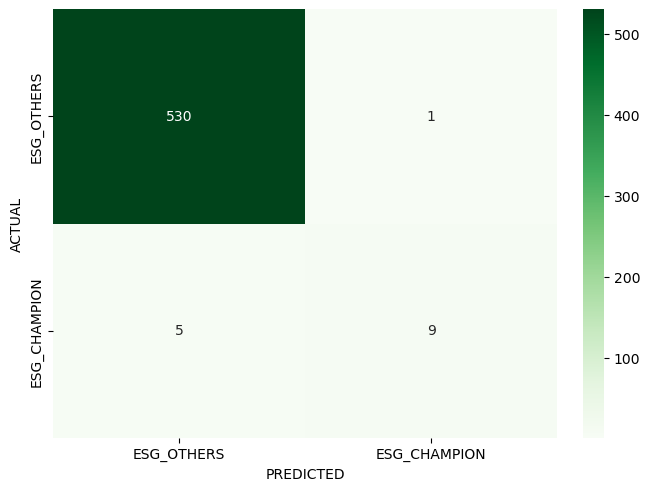

In [467]:
#Print Confusion Metrics - logreg_model_poly_3
# Reference - ICMA Lecture Code Files by Dr Mininder Sethi
y_test_pred=logreg_model_poly_3.predict(test_x_scaled_poly)
cm_poly_3 = metrics.confusion_matrix(test_y_3, y_test_pred)  
labels_ESG = ['ESG_OTHERS','ESG_CHAMPION']

df_cm=pd.DataFrame(cm_poly_3, columns=labels_ESG, index=labels_ESG)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'

fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm, ax=ax, cmap="Greens", annot=True,  fmt='g')

In [468]:
#Model Classification Report for - logreg_model_poly_3
'''from sklearn.metrics import classification_report
print(classification_report(test_y_3, y_test_pred))'''

'from sklearn.metrics import classification_report\nprint(classification_report(test_y_3, y_test_pred))'

In [469]:
#Model 1d - Logistic Regression - Multiclass Polynomial using single clasifier -The LogisticRegression model will directly handle multiple classes
from sklearn.preprocessing import LabelEncoder

train_x_scaled_poly
enc_y=LabelEncoder()
labels=enc_y.fit_transform(train_y['CATEGORY'])
logreg=LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='auto')
logreg.fit(train_x_scaled_poly, labels)

LogisticRegression(max_iter=1000)

In [470]:
labels_x=enc_y.fit_transform(train_y['CATEGORY'])

labels_y=enc_y.fit_transform(test_y['CATEGORY'])

In [471]:
# Check accuracy for test data set for the single classifier
logreg.score(test_x_scaled_poly, test_y_ALL.values.ravel())
#logreg.score(test_x_scaled_poly, labels_y)

0.8220183486238533

In [472]:
logreg.score(train_x_scaled_poly, train_y_ALL)

0.977183320220299

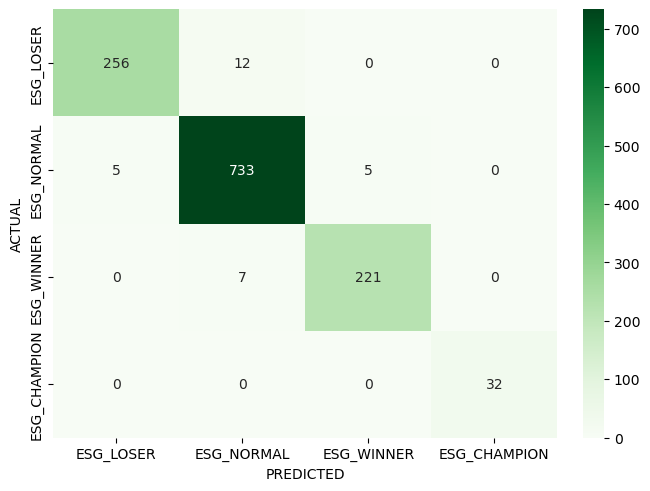

In [473]:
# Print confusion matrix over the Training Set - Model 1d
# Reference - ICMA Lecture Code Files by Dr Mininder Sethi

from sklearn.metrics import confusion_matrix
import seaborn as sn

y_train_pred=logreg.predict(train_x_scaled_poly)
cm_train=confusion_matrix(labels, y_train_pred)  

labels_ESG = ['ESG_LOSER','ESG_NORMAL','ESG_WINNER', 'ESG_CHAMPION']

df_cm=pd.DataFrame(cm_train, columns=labels_ESG, index=labels_ESG)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'

fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm, ax=ax, cmap="Greens", annot=True,  fmt='g')


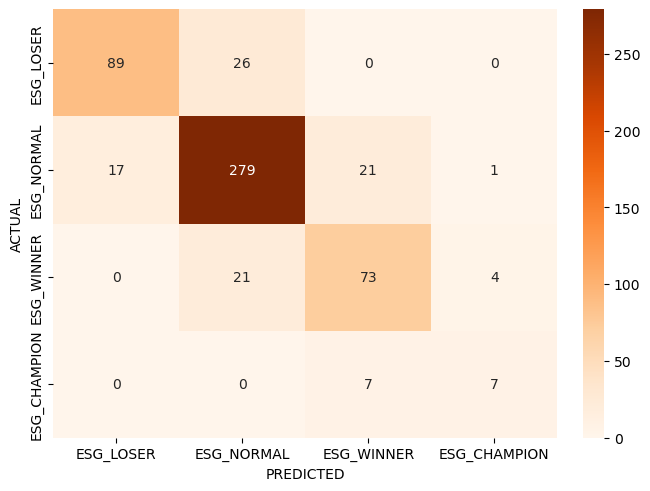

In [474]:
# Print confusion matrix over the Test Set - Model 1d
# Reference - ICMA Lecture Code Files by Dr Mininder Sethi
labels=enc_y.transform(test_y['CATEGORY'])
labels2 = labels
y_test_pred=logreg.predict(test_x_scaled_poly)
cm_test=confusion_matrix(labels, y_test_pred)  

# Printe confusion matrix over the Test Set ..contd
labels_ESG = ['ESG_LOSER','ESG_NORMAL','ESG_WINNER', 'ESG_CHAMPION']

df_cm_test =pd.DataFrame(cm_test, columns=labels_ESG , index=labels_ESG )
df_cm_test.index.name = 'ACTUAL'
df_cm_test.columns.name = 'PREDICTED'

fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm_test, ax=ax, cmap="Oranges", annot=True,  fmt='g')

In [475]:
# Prediction - Model 1d
y_test_predicted = logreg.predict(test_x_scaled_poly)
y_test_predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 3, 1,
       1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1,
       1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 3, 1, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1,
       2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2,

In [476]:
print('Misclassified examples:%d' % (test_y_ALL.values.ravel() != y_test_predicted).sum()) 

#print('Misclassified examples:%d' % (labels != y_test_predicted).sum()) 

Misclassified examples:97


In [477]:
print('Correct classified examples:%d' % (labels == y_test_predicted).sum()) 

Correct classified examples:448


In [478]:
#Model 2a : Decision tree
from sklearn.tree import DecisionTreeClassifier

model2a = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=10)
# Train the Decison tree model
model2a.fit(train_x_scaled, train_y_ALL.values.ravel())

DecisionTreeClassifier(max_depth=8, random_state=10)

In [479]:
# Check accuracy for test data set
model2a.score(test_x_scaled, test_y_ALL.values.ravel())

0.7577981651376147

In [480]:
# Check accuracy for training data set
model2a.score(train_x_scaled, train_y_ALL.values.ravel())

0.9425649095200629

In [481]:
#Model 2b : Random Forest - We will use another Machine Learning Non-Parametric Model for this dataset
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(criterion = 'gini',  n_estimators = 100, random_state = 1, n_jobs=3)
model2.fit(train_x_scaled, train_y_ALL.values.ravel())


RandomForestClassifier(n_jobs=3, random_state=1)

In [482]:
# Check accuracy for test data set
model2.score(train_x_scaled, train_y_ALL.values.ravel())

1.0

In [483]:
# Check accuracy for test data set
model2.score(test_x_scaled, test_y_ALL.values.ravel())

0.7834862385321101

In [484]:
### Above results indidcate we should try Dropping the Feature with null values - FEAT_G8 to retain more data

In [485]:
df_workingdata2 = df_masterdata.copy()
df_workingdata2

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1997        4     0.09        2        4        0     0.19        1        4   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G5  FEAT_G6  FEAT_G7  FEAT_G8  \
0           9      0.2     0.16    -0.16     0.16  GROUP_B        7      6.0   
1          10      0.4     0.03    -0.58     0.58  GROUP_B        7      4.0   
2           5      0.1     0.00    -0.89     0.89  GROUP_B        5     10.0   
3           1      0.3     0.97    -0.01     0.01  GROUP_A        0      7.0   
4           4      0.9     0.47    -0.67     0.67  GROUP_A        3      7.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        2      0.2     0.71     0.00     0.00  GROUP_A        1      3.0   
1996        1      0.7     0.15    -0.88     0.88  GROUP_A        0      9.0   
1997        6      0.9     0.16    -0.52     0.52  GROUP_C        9      NaN   
1998        7      0.8     0.02    -0.28     0.28  GROUP_A        4      8.0   
1999        2      0.6     0.31     0.00     0.00  GROUP_A        2      2.0   

      CATEGORY  
0            2  
1            2  
2            2  
3            0  
4            1  
...        ...  
1995         1  
1996         0  
1997         0  
1998         0  
1999         0  

[2000 rows x 17 columns]

In [486]:
#Drop Feature G8 having null values. We can drop this feature as this is not significant as seen from Data Exploratory Analysis and Coefficiants Analysis obove
df_workingdata2 = df_workingdata2.drop(columns = 'FEAT_G8')
df_workingdata2

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1997        4     0.09        2        4        0     0.19        1        4   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G5  FEAT_G6  FEAT_G7  CATEGORY  
0           9      0.2     0.16    -0.16     0.16  GROUP_B        7         2  
1          10      0.4     0.03    -0.58     0.58  GROUP_B        7         2  
2           5      0.1     0.00    -0.89     0.89  GROUP_B        5         2  
3           1      0.3     0.97    -0.01     0.01  GROUP_A        0         0  
4           4      0.9     0.47    -0.67     0.67  GROUP_A        3         1  
...       ...      ...      ...      ...      ...      ...      ...       ...  
1995        2      0.2     0.71     0.00     0.00  GROUP_A        1         1  
1996        1      0.7     0.15    -0.88     0.88  GROUP_A        0         0  
1997        6      0.9     0.16    -0.52     0.52  GROUP_C        9         0  
1998        7      0.8     0.02    -0.28     0.28  GROUP_A        4         0  
1999        2      0.6     0.31     0.00     0.00  GROUP_A        2         0  

[2000 rows x 16 columns]

In [487]:
#df_workingdata2['FEAT_G6_GROUP_A'] = df_workingdata2['FEAT_G6'] == 'GROUP_B' 

In [488]:
df_workingdata2 = pd.get_dummies(df_workingdata2, dtype = int)
df_workingdata2

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1997        4     0.09        2        4        0     0.19        1        4   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G4  FEAT_G5  FEAT_G7  CATEGORY  \
0           9      0.2     0.16    -0.16     0.16        7         2   
1          10      0.4     0.03    -0.58     0.58        7         2   
2           5      0.1     0.00    -0.89     0.89        5         2   
3           1      0.3     0.97    -0.01     0.01        0         0   
4           4      0.9     0.47    -0.67     0.67        3         1   
...       ...      ...      ...      ...      ...      ...       ...   
1995        2      0.2     0.71     0.00     0.00        1         1   
1996        1      0.7     0.15    -0.88     0.88        0         0   
1997        6      0.9     0.16    -0.52     0.52        9         0   
1998        7      0.8     0.02    -0.28     0.28        4         0   
1999        2      0.6     0.31     0.00     0.00        2         0   

      FEAT_G6_GROUP_A  FEAT_G6_GROUP_B  FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  
0                   0                1                0                0  
1                   0                1                0                0  
2                   0                1                0                0  
3                   1                0                0                0  
4                   1                0                0                0  
...               ...              ...              ...              ...  
1995                1                0                0                0  
1996                1                0                0                0  
1997                0                0                1                0  
1998                1                0                0                0  
1999                1                0                0                0  

[2000 rows x 19 columns]

In [489]:
# We can drop Feature G4 (instead of G5 in this iteration )as this is redundant and exact inverse of FEAT_G5
df_workingdata3 = df_workingdata2.drop(columns = 'FEAT_G4')
df_workingdata3

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1997        4     0.09        2        4        0     0.19        1        4   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G5  FEAT_G7  CATEGORY  FEAT_G6_GROUP_A  \
0           9      0.2     0.16     0.16        7         2                0   
1          10      0.4     0.03     0.58        7         2                0   
2           5      0.1     0.00     0.89        5         2                0   
3           1      0.3     0.97     0.01        0         0                1   
4           4      0.9     0.47     0.67        3         1                1   
...       ...      ...      ...      ...      ...       ...              ...   
1995        2      0.2     0.71     0.00        1         1                1   
1996        1      0.7     0.15     0.88        0         0                1   
1997        6      0.9     0.16     0.52        9         0                0   
1998        7      0.8     0.02     0.28        4         0                1   
1999        2      0.6     0.31     0.00        2         0                1   

      FEAT_G6_GROUP_B  FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  
0                   1                0                0  
1                   1                0                0  
2                   1                0                0  
3                   0                0                0  
4                   0                0                0  
...               ...              ...              ...  
1995                0                0                0  
1996                0                0                0  
1997                0                1                0  
1998                0                0                0  
1999                0                0                0  

[2000 rows x 18 columns]

In [490]:
df_workingdata3_Y = df_workingdata3['CATEGORY']
df_workingdata3_Y

0       2
1       2
2       2
3       0
4       1
       ..
1995    1
1996    0
1997    0
1998    0
1999    0
Name: CATEGORY, Length: 2000, dtype: int64

In [491]:
df_workingdata3_X = df_workingdata3.drop(columns = 'CATEGORY')
df_workingdata3_X

FEAT_E1  FEAT_E2  FEAT_E3  FEAT_E4  FEAT_S1  FEAT_S2  FEAT_S3  FEAT_S4  \
0           3     0.02        1        3        9     0.01        1        2   
1           7     0.01        1        4        7     0.38        1        4   
2           3     0.29        1        3        1     0.01        2        1   
3           3     0.00        0        3        5     0.08        0        4   
4           9     0.38        1        3        2     0.24        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        3     0.00        2        5        4     0.79        1        2   
1996        2     0.59        1        4        1     0.86        1        5   
1997        4     0.09        2        4        0     0.19        1        4   
1998        0     0.33        0        3        0     0.03        0        2   
1999        5     0.50        2        3        0     0.71        1        2   

      FEAT_G1  FEAT_G2  FEAT_G3  FEAT_G5  FEAT_G7  FEAT_G6_GROUP_A  \
0           9      0.2     0.16     0.16        7                0   
1          10      0.4     0.03     0.58        7                0   
2           5      0.1     0.00     0.89        5                0   
3           1      0.3     0.97     0.01        0                1   
4           4      0.9     0.47     0.67        3                1   
...       ...      ...      ...      ...      ...              ...   
1995        2      0.2     0.71     0.00        1                1   
1996        1      0.7     0.15     0.88        0                1   
1997        6      0.9     0.16     0.52        9                0   
1998        7      0.8     0.02     0.28        4                1   
1999        2      0.6     0.31     0.00        2                1   

      FEAT_G6_GROUP_B  FEAT_G6_GROUP_C  FEAT_G6_GROUP_D  
0                   1                0                0  
1                   1                0                0  
2                   1                0                0  
3                   0                0                0  
4                   0                0                0  
...               ...              ...              ...  
1995                0                0                0  
1996                0                0                0  
1997                0                1                0  
1998                0                0                0  
1999                0                0                0  

[2000 rows x 17 columns]

In [492]:
# We will optimize our model using significant features discovered from above modelling and data analysis
df_workingdata3_X_optimized = df_workingdata3_X.drop(columns={'FEAT_E1','FEAT_E2','FEAT_S1', 'FEAT_G7', 'FEAT_G6_GROUP_A','FEAT_G6_GROUP_B','FEAT_G6_GROUP_C','FEAT_G6_GROUP_D'})
df_workingdata3_X_optimized

FEAT_E3  FEAT_E4  FEAT_S2  FEAT_S3  FEAT_S4  FEAT_G1  FEAT_G2  FEAT_G3  \
0           1        3     0.01        1        2        9      0.2     0.16   
1           1        4     0.38        1        4       10      0.4     0.03   
2           1        3     0.01        2        1        5      0.1     0.00   
3           0        3     0.08        0        4        1      0.3     0.97   
4           1        3     0.24        2        2        4      0.9     0.47   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1995        2        5     0.79        1        2        2      0.2     0.71   
1996        1        4     0.86        1        5        1      0.7     0.15   
1997        2        4     0.19        1        4        6      0.9     0.16   
1998        0        3     0.03        0        2        7      0.8     0.02   
1999        2        3     0.71        1        2        2      0.6     0.31   

      FEAT_G5  
0        0.16  
1        0.58  
2        0.89  
3        0.01  
4        0.67  
...       ...  
1995     0.00  
1996     0.88  
1997     0.52  
1998     0.28  
1999     0.00  

[2000 rows x 9 columns]

In [493]:
df_workingdata3_Y_optimized = df_workingdata3_Y

In [494]:
## Train Test Split using stratify to preserve the balance / proportion of class categories in the split data
# This time we will Split in the ratio of 80:20 i.e training set (80%) and a test set (20%)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(df_workingdata3_X, df_workingdata3_Y,  test_size=0.2, random_state=10 , stratify = df_workingdata3_Y)
train_x_opt, test_x_opt, train_y_opt, test_y_opt =train_test_split(df_workingdata3_X_optimized, df_workingdata3_Y,  test_size=0.2, random_state=10 , stratify = df_workingdata3_Y)

In [495]:
test_x.shape

(400, 17)

In [496]:
train_y.shape

(1600,)

In [497]:
test_y.shape

(400,)

In [498]:
test_x_opt.shape

(400, 9)

In [499]:
### Step  - Feature Scaling
# Use Scalers on the x part of the Training Set
from sklearn.preprocessing import StandardScaler
scaler_x =  StandardScaler().fit(train_x)
train_x_scaled=scaler_x.transform(train_x)
test_x_scaled = scaler_x.transform(test_x)

In [500]:
### Step  - Feature Scaling - Optimized
# Use Scalers on the x part of the Training Set
from sklearn.preprocessing import StandardScaler
scaler_x_opt =  StandardScaler().fit(train_x_opt)
train_x_scaled_opt=scaler_x_opt.transform(train_x_opt)
test_x_scaled_opt = scaler_x_opt.transform(test_x_opt)

In [501]:
train_x_scaled_opt.shape

(1600, 9)

In [502]:
test_y_opt

889     1
1484    2
1094    0
1036    0
304     1
       ..
637     2
1820    1
623     1
987     1
1252    1
Name: CATEGORY, Length: 400, dtype: int64

In [503]:
## Model 3a - Basic Logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class = 'auto')
model.fit(train_x_scaled, train_y.values.ravel())

LogisticRegression()

In [504]:
## Model 3b - Optimized
from sklearn.linear_model import LogisticRegression
#model_opt = LogisticRegression(multi_class = 'auto')
model_opt = LogisticRegression(penalty = 'l2', C= 1, solver = 'lbfgs', multi_class = 'multinomial')
model_opt.fit(train_x_scaled_opt, train_y_opt.values.ravel())

LogisticRegression(C=1, multi_class='multinomial')

In [505]:
test_x_scaled.shape

(400, 17)

In [506]:
test_y.shape

(400,)

In [507]:
# Check accuracy for test data set - Model 3a
model.score(test_x_scaled, test_y.values.ravel())

0.835

In [508]:
y_test_pred_model3a = model.predict(test_x_scaled)

In [509]:
#Model 3a Classification Report - Model 3a
from sklearn.metrics import classification_report
print(classification_report(test_y, y_test_pred_model3a))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        83
           1       0.86      0.89      0.87       234
           2       0.75      0.67      0.71        73
           3       0.75      0.60      0.67        10

    accuracy                           0.83       400
   macro avg       0.80      0.75      0.77       400
weighted avg       0.83      0.83      0.83       400



In [510]:
# Check accuracy for test data set - Model 3b
model_opt.score(test_x_scaled_opt, test_y_opt.values.ravel())

0.76

In [511]:
# Check accuracy for training data set - Model 3b
model_opt.score(train_x_scaled_opt, train_y_opt.values.ravel())

0.7675

In [512]:
y_test_pred_model3b = model_opt.predict(test_x_scaled_opt)

In [513]:
print(classification_report(test_y_opt.values.ravel(), y_test_pred_model3b))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        83
           1       0.78      0.85      0.81       234
           2       0.66      0.52      0.58        73
           3       0.86      0.60      0.71        10

    accuracy                           0.76       400
   macro avg       0.76      0.68      0.71       400
weighted avg       0.76      0.76      0.75       400



In [514]:
## Model 4a - Logistic Regression using polynomial features and single classifier
from sklearn.preprocessing import PolynomialFeatures

order=2
polynomial_features=PolynomialFeatures(degree=order, include_bias=False)
scaler_x_poly =  polynomial_features.fit(train_x_scaled)
train_x_scaled_poly =scaler_x_poly.transform(train_x_scaled)
test_x_scaled_poly  = scaler_x_poly.transform(test_x_scaled)

In [515]:
## Model 4b - Logistic Regression using polynomial features and single classifier - Optimized for selected features
from sklearn.preprocessing import PolynomialFeatures

order=2
polynomial_features_opt=PolynomialFeatures(degree=order, include_bias=False)
scaler_x_poly_opt =  polynomial_features_opt.fit(train_x_scaled_opt)
train_x_scaled_poly_opt =scaler_x_poly_opt.transform(train_x_scaled_opt)
test_x_scaled_poly_opt  = scaler_x_poly_opt.transform(test_x_scaled_opt)

train_x_scaled_poly_opt.shape

(1600, 54)

In [516]:
test_x_scaled_poly_opt.shape

(400, 54)

In [517]:
#Model 4a  - Logistic Regression - Multiclass Polynomial using single clasifier -The LogisticRegression model will directly handle multiple classes
from sklearn.preprocessing import LabelEncoder

train_x_scaled_poly
enc_y=LabelEncoder()
labels=enc_y.fit_transform(train_y)
logreg=LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='auto')
logreg.fit(train_x_scaled_poly, labels)

LogisticRegression(max_iter=1000)

In [518]:
# Check accuracy for test data set for the single classifier - Model 4a 
logreg.score(test_x_scaled_poly, test_y.values.ravel())

0.8575

In [519]:
# Check accuracy for train data set for the single classifier
logreg.score(train_x_scaled_poly, train_y.values.ravel())

0.95125

In [520]:
#Model 4b - Logistic Regression - Multiclass Polynomial using single clasifier - Optimized for selected features
# The LogisticRegression model will directly handle multiple classes
from sklearn.preprocessing import LabelEncoder

train_x_scaled_poly_opt
enc_y_opt=LabelEncoder()
labels_opt=enc_y_opt.fit_transform(train_y_opt)
logreg_opt=LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='auto')
logreg_opt.fit(train_x_scaled_poly_opt, labels_opt)

LogisticRegression(max_iter=1000)

In [521]:
# Check accuracy for test data set for the single classifier
logreg_opt.score(test_x_scaled_poly_opt, test_y_opt.values.ravel())

0.85

In [522]:
# Check accuracy for training data set for the single classifier
logreg_opt.score(train_x_scaled_poly_opt, train_y_opt.values.ravel())

0.856875

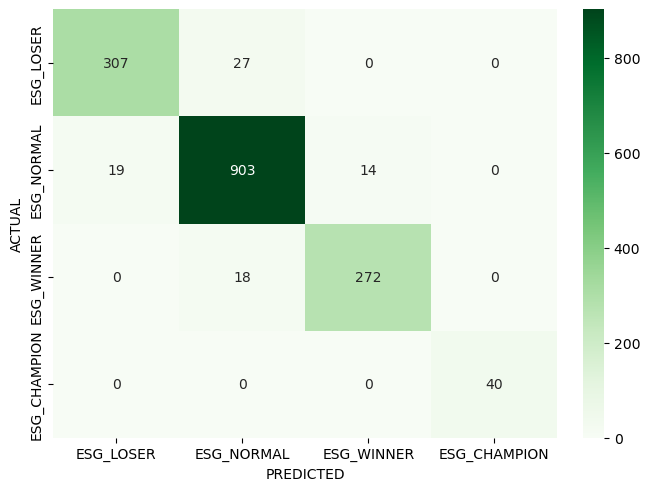

In [523]:
# Print the confusion matrix over the Training Set - Model 4a

from sklearn.metrics import confusion_matrix
import seaborn as sn

y_train_pred=logreg.predict(train_x_scaled_poly)
cm_train=confusion_matrix(labels, y_train_pred)  

labels_ESG = ['ESG_LOSER','ESG_NORMAL','ESG_WINNER', 'ESG_CHAMPION']

df_cm=pd.DataFrame(cm_train, columns=labels_ESG, index=labels_ESG)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'

fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm, ax=ax, cmap="Greens", annot=True,  fmt='g')


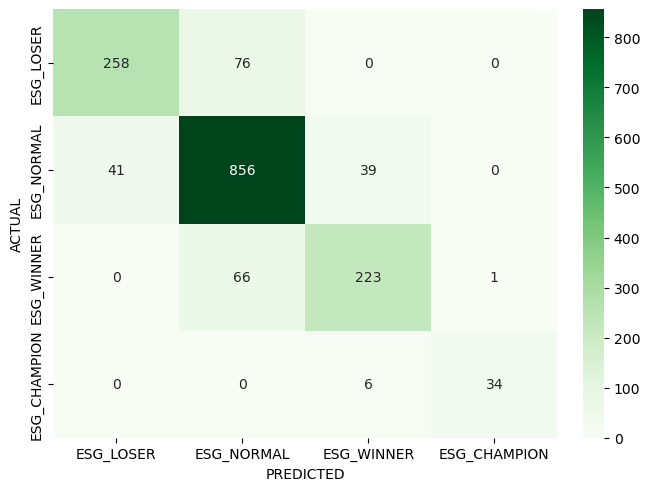

In [524]:
# Print the confusion matrix over the Training Set for Optimized featureset - Model 4b

from sklearn.metrics import confusion_matrix
import seaborn as sn

y_train_pred_opt=logreg_opt.predict(train_x_scaled_poly_opt)
cm_train_opt=confusion_matrix(labels_opt, y_train_pred_opt)  

labels_ESG = ['ESG_LOSER','ESG_NORMAL','ESG_WINNER', 'ESG_CHAMPION']

df_cm_opt = pd.DataFrame(cm_train_opt, columns=labels_ESG, index=labels_ESG)
df_cm_opt.index.name = 'ACTUAL'
df_cm_opt.columns.name = 'PREDICTED'

fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm_opt, ax=ax, cmap="Greens", annot=True,  fmt='g')


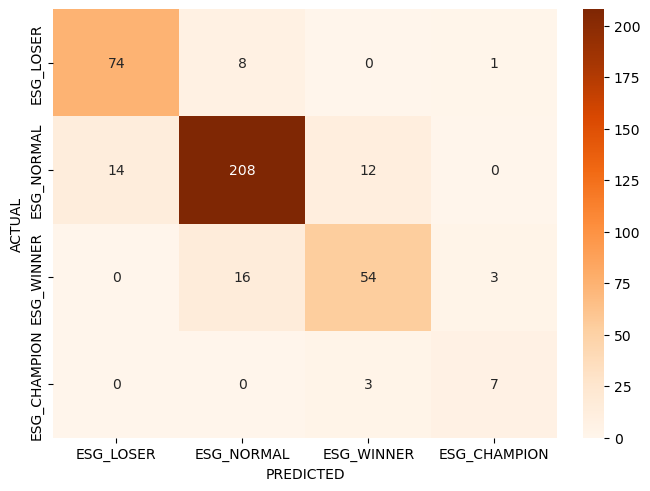

In [525]:
# Print the confusion matrix over the Test Set ..contd - Model 4a

labels=enc_y.transform(test_y)
labels2 = labels
y_test_pred=logreg.predict(test_x_scaled_poly)
cm_test=confusion_matrix(labels, y_test_pred)  

labels_ESG = ['ESG_LOSER','ESG_NORMAL','ESG_WINNER', 'ESG_CHAMPION']

df_cm_test =pd.DataFrame(cm_test, columns=labels_ESG , index=labels_ESG )
df_cm_test.index.name = 'ACTUAL'
df_cm_test.columns.name = 'PREDICTED'

fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm_test, ax=ax, cmap="Oranges", annot=True,  fmt='g')

In [526]:
#Model 4a Classification Report - Model 4a
from sklearn.metrics import classification_report
print(classification_report(labels, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        83
           1       0.90      0.89      0.89       234
           2       0.78      0.74      0.76        73
           3       0.64      0.70      0.67        10

    accuracy                           0.86       400
   macro avg       0.79      0.81      0.80       400
weighted avg       0.86      0.86      0.86       400



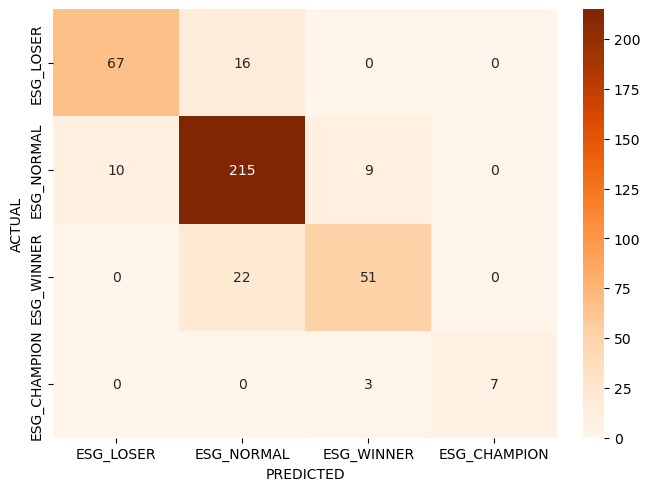

In [527]:
# Print the confusion matrix over the Test Set ..contd - Optimized - Model 4b

labels_y_opt = enc_y_opt.fit_transform(test_y_opt)

y_test_pred_opt = logreg_opt.predict(test_x_scaled_poly_opt)
cm_test_opt = confusion_matrix(labels_y_opt, y_test_pred_opt)  

labels_ESG = ['ESG_LOSER','ESG_NORMAL','ESG_WINNER', 'ESG_CHAMPION']

df_cm_test_opt =pd.DataFrame(cm_test_opt, columns=labels_ESG , index=labels_ESG )
df_cm_test_opt.index.name = 'ACTUAL'
df_cm_test_opt.columns.name = 'PREDICTED'

fig, ax= plt.subplots(constrained_layout=True)
snFig=sn.heatmap(df_cm_test_opt, ax=ax, cmap="Oranges", annot=True,  fmt='g')

In [528]:
#Model 4b Classification Report - Optimized
from sklearn.metrics import classification_report
print(classification_report(labels_y_opt, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        83
           1       0.85      0.92      0.88       234
           2       0.81      0.70      0.75        73
           3       1.00      0.70      0.82        10

    accuracy                           0.85       400
   macro avg       0.88      0.78      0.82       400
weighted avg       0.85      0.85      0.85       400



In [529]:
#Model 5a : Random Forest model to see if the accuracy can be optimized further
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(criterion = 'gini',  n_estimators = 100, random_state = 1, n_jobs=3)
model2.fit(train_x_scaled, train_y.values.ravel())

RandomForestClassifier(n_jobs=3, random_state=1)

In [530]:
# Check accuracy for test data set - Model 2c 
model2.score(test_x_scaled, test_y.values.ravel())

0.82

In [531]:
model2.feature_importances_

array([0.0423286 , 0.06130524, 0.02028772, 0.02945051, 0.06959209,
       0.06141747, 0.07091497, 0.07287709, 0.15972484, 0.10838554,
       0.11237012, 0.11064647, 0.0448765 , 0.01033385, 0.00760914,
       0.01001421, 0.00786566])

In [532]:
#Model 5b : Random Forest - Optimized
from sklearn.ensemble import RandomForestClassifier
model2_opt = RandomForestClassifier(criterion = 'gini',  n_estimators = 100, random_state = 1, n_jobs=3)
model2_opt.fit(train_x_scaled_opt, train_y_opt.values.ravel())

RandomForestClassifier(n_jobs=3, random_state=1)

In [533]:
# Check accuracy for test data set - Model 2d
model2_opt.score(test_x_scaled_opt, test_y_opt.values.ravel())

0.8075